# PPT → Markdown (v3: Better Text Joining + Tables + Equations)

**Source**: `[10차시] LV3_2-7 연관성 분석_0829_완.pptx`

개선 사항:
- **폰트/스타일로 분리된 run들을 문장 단위로 매끄럽게 연결**
- 줄바꿈(br) 보존, 불필요한 공백 정리, 소프트 하이픈 제거
- bullet(기본) 감지 후 접두사 적용
- 기존 이미지/테이블/수식/헤더 로직 그대로 유지

### Slide 1: (Untitled)

- 10. 연관성 분석


### Slide 2: (Untitled)

- 연관성 분석
- 변수
- 구분
- 분석 방법
- 수치형
- 이진 범주형
- 모수적
- t–검정
- Paired t-검정
- 비모수적
- Mann-Whitney U
- Wilcoxon 부호 순위 검정
- 수치형
- 모수적
- Pearson 상관도
- 비모수적
- Spearman 상관도
- Kendall 계수
- 범주형
- 모수적
- 일원 분산분석
- 비모수적
- Kruskal-Wallis
- 범주형 1, 범주형 2, 교호항
- 모수적
- 이원 분산분석
- 범주형
- 범주형
- 비모수적
- 카이제곱 독립성 검정
- 1
- 변수 간의 연관성을 분석하기 위한 방법

**Table 2.1**
| 변수 |   | 구분 | 분석 방법 |
| --- | --- | --- | --- |
| 수치형 | 이진 범주형 | 모수적 | t–검정
Paired t-검정 |
|   |   | 비모수적 | Mann-Whitney U
Wilcoxon 부호 순위 검정 |
|   | 수치형 | 모수적 | Pearson 상관도 |
|   |   | 비모수적 | Spearman 상관도
Kendall 계수 |
|   | 범주형 | 모수적 | 일원 분산분석 |
|   |   | 비모수적 | Kruskal-Wallis |
|   | 범주형 1, 범주형 2, 교호항 | 모수적 | 이원 분산분석 |
| 범주형 | 범주형 | 비모수적 | 카이제곱 독립성 검정 |

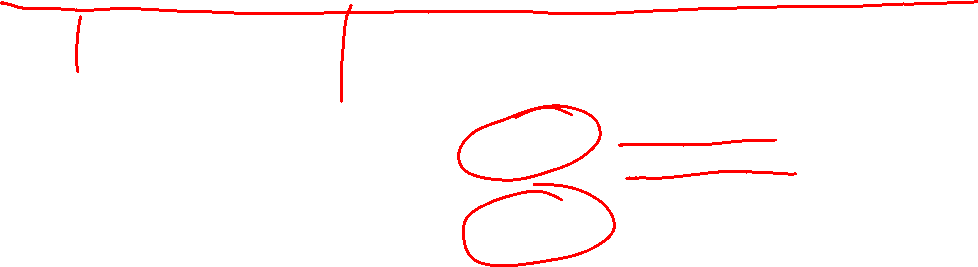


### Slide 3: (Untitled)

- 모수적 vs 비모수적 검정 방법
- 모수(평균, 분산, …)에 대해 검정
- 데이터가 특정 분포(보통 정규분포)를 따른다고 가정
- 2
- 모수적 검정 방법
- 순위나 빈도 정보 활용
- 데이터가 특정 분포를 따른다는 가정 없음
- 비모수적 검정 방법

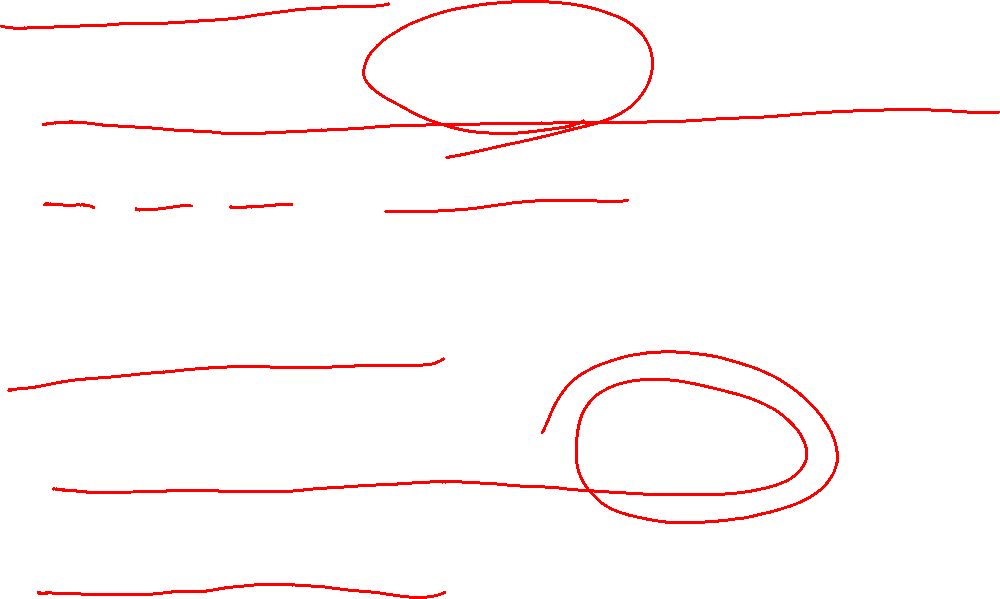


### Slide 4: (Untitled)

- 모수적 vs 비모수적 검정 방법
- 장점
- 단점
- 모수적 검정 방법
- 검정력이 높고 정확도가 우수
- 가정이 틀리면 결과 왜곡 가능
- 비모수적 검정 방법
- 유연하고 이상치에 강함
- 검정력이 상대적으로 낮을 수 있음
- 2
- 특징

**Table 4.1**
|   | 장점 | 단점 |
| --- | --- | --- |
| 모수적 검정 방법 | 검정력이 높고 정확도가 우수 | 가정이 틀리면 결과 왜곡 가능 |
| 비모수적 검정 방법 | 유연하고 이상치에 강함 | 검정력이 상대적으로 낮을 수 있음 |

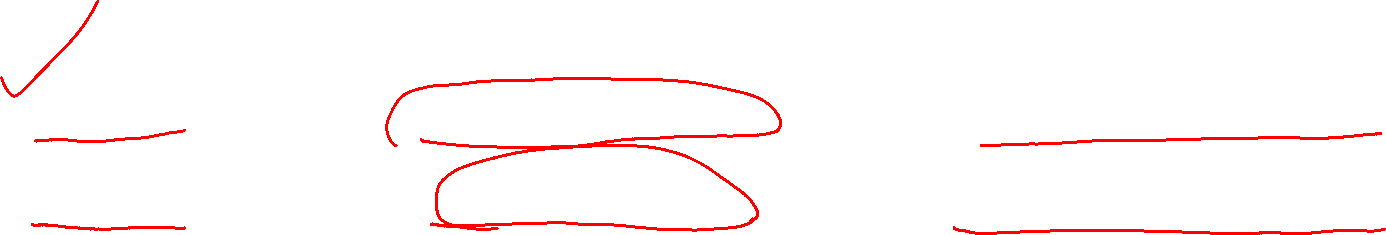


### Slide 5: (Untitled)

- 정규성 검정
- 정규성을 가정하고 있는 방법에서 유효성을 확인하기 위해 사용
- 3
- 검정 내용
- : 정규분포를 따름
- : 정규분포를 따르지 않음

**Equation 5.1**
$$
𝐻0
$$

**Equation 5.2**
$$
𝐻1
$$

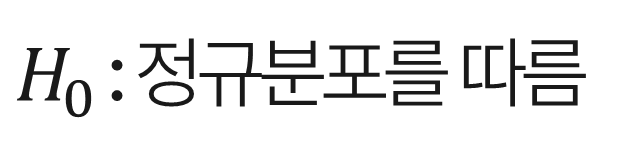
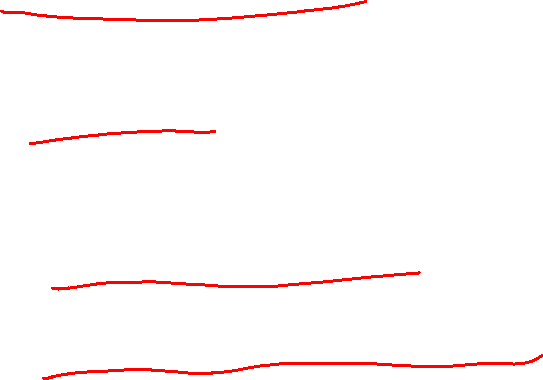
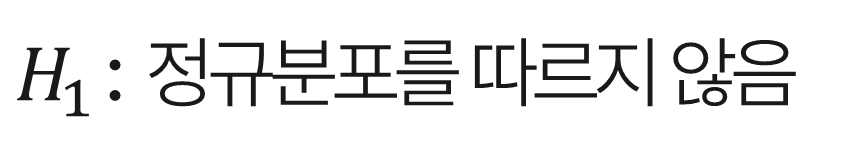


### Slide 6: (Untitled)

- 정규성 검정
- 정렬된 표본
- 소표본에 높은 정밀도를 보이는 검정법
- 𝑛≤50(n: 표본수)일 때 많이 사용
- 3
- Shapiro-Wilk
- W 가 클수록 정규분포에 가까움
- : 정규분포 분위수 기반으로
- 계산된 가중치 계수

**Equation 6.1**
$$
𝑊=𝑖=1𝑛𝑎𝑖𝑥𝑖2𝑖=1𝑛𝑥𝑖−𝑥2
$$

**Equation 6.2**
$$
𝑥(1)≤𝑥2≤…𝑥(𝑛)
$$

**Equation 6.3**
$$
𝑎i
$$

**Equation 6.4**
$$
𝑊=𝑖=1𝑛𝑎𝑖𝑥𝑖2𝑖=1𝑛𝑥𝑖−𝑥2
$$

**Equation 6.5**
$$
𝑥(1)≤𝑥2≤…𝑥(𝑛)
$$

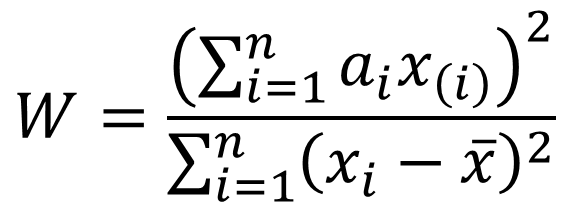
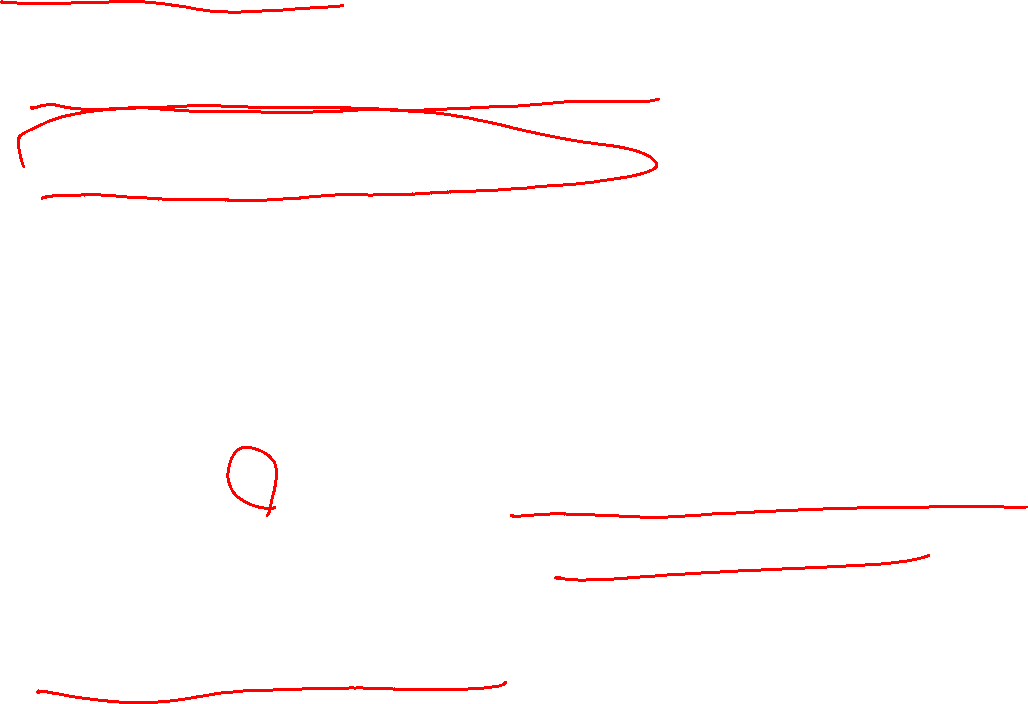
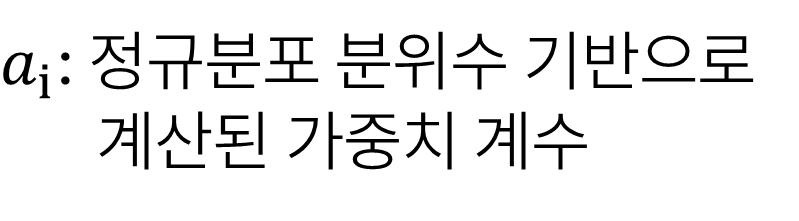
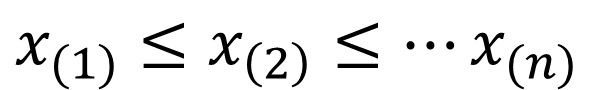


### Slide 7: (Untitled)

- 정규성 검정
- 계산이 간단
- 다수의 표본에서 안정적 성능(> 2000)
- 우측 꼬리 검정
- 왜도(Skewness)는 0, 첨도(Kurtosis)는 3 에서 벗어날수록 정규성이 약해지는 성질 이용
- 3
- Jarque Bera

**Equation 7.1**
$$
𝐽𝐵=𝑛6𝑆2+𝐾−324~𝜒2(2)
$$

**Equation 7.2**
$$
𝐽𝐵=𝑛6𝑆2+𝐾−324~𝜒2(2)
$$

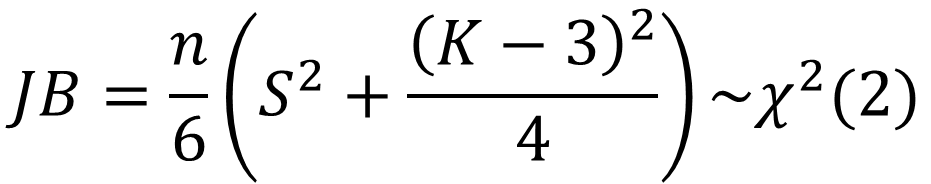
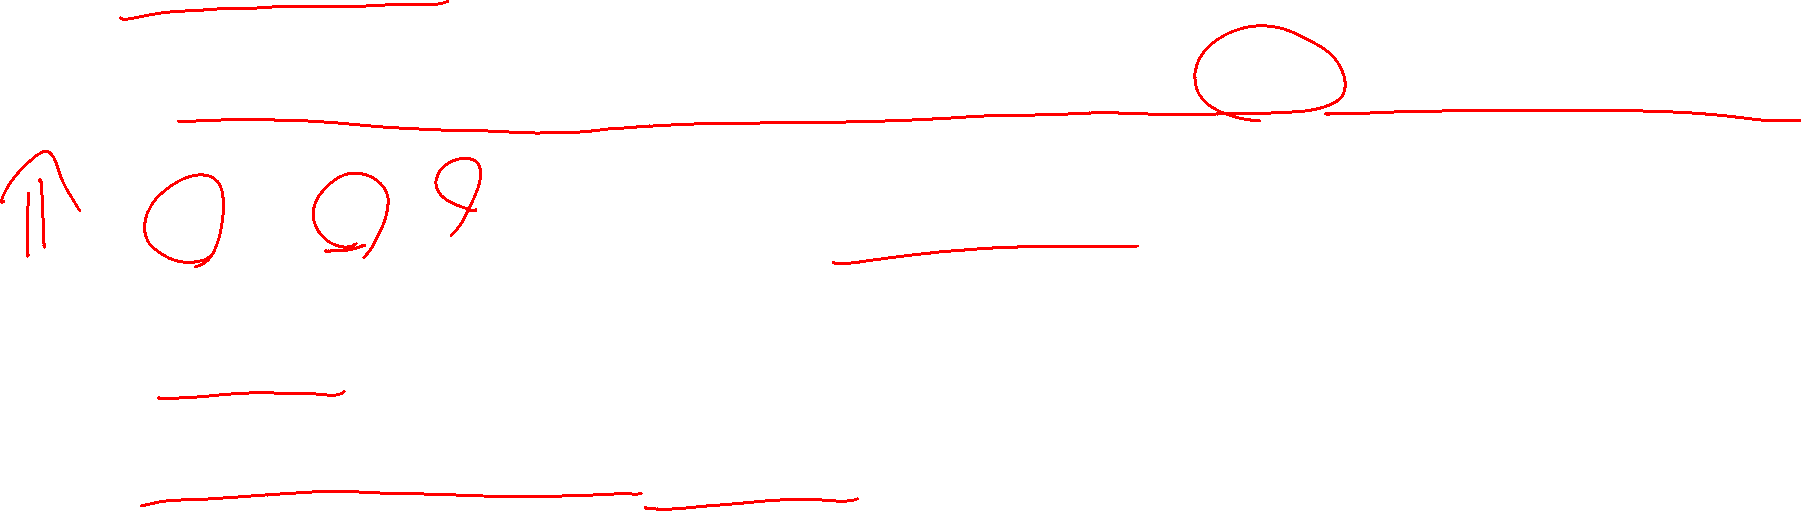


### Slide 8: (Untitled)

- 정규성 검정
- 표본의 누적분포함수(ECDF)와 비교 대상의 누적분포함수의 차이 이용
- 3
- Kolmogorov Smirnov

**Equation 8.1**
$$
𝐷=𝑠𝑢𝑝𝑥𝐹𝑛𝑥−𝐹(𝑥)
$$

**Equation 8.2**
$$
𝐷=𝑠𝑢𝑝𝑥𝐹𝑛𝑥−𝐹(𝑥)
$$

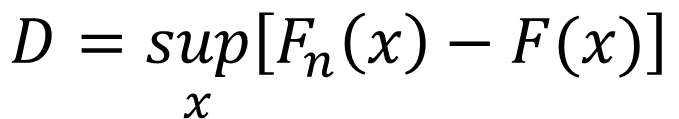
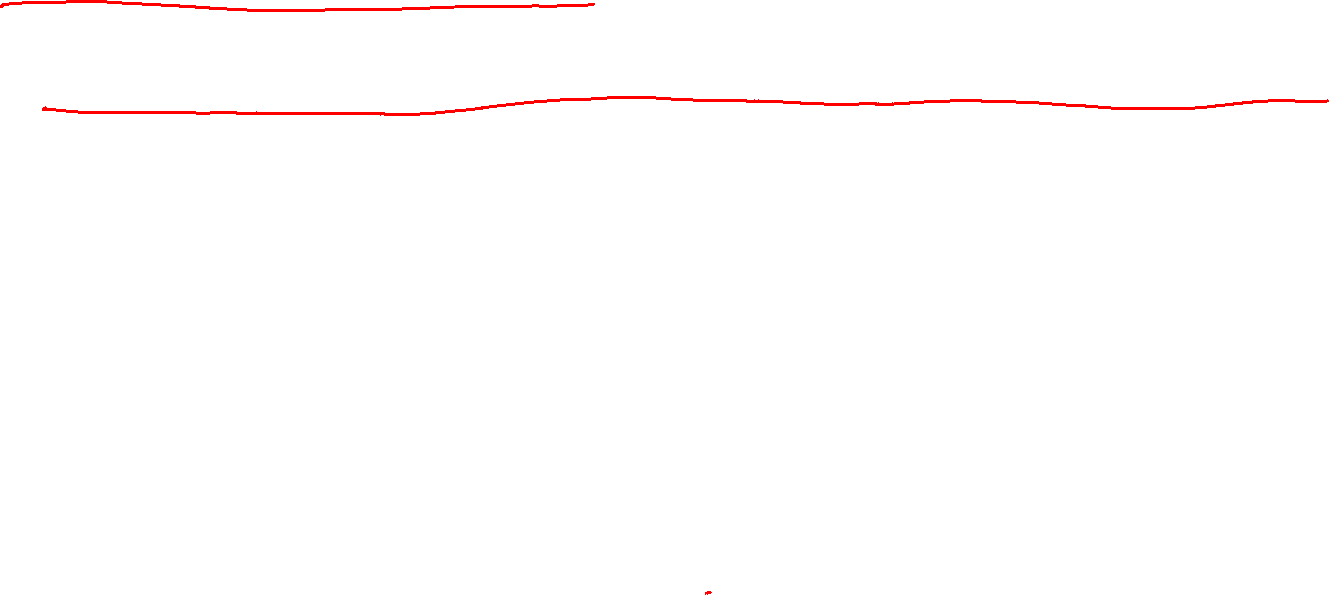
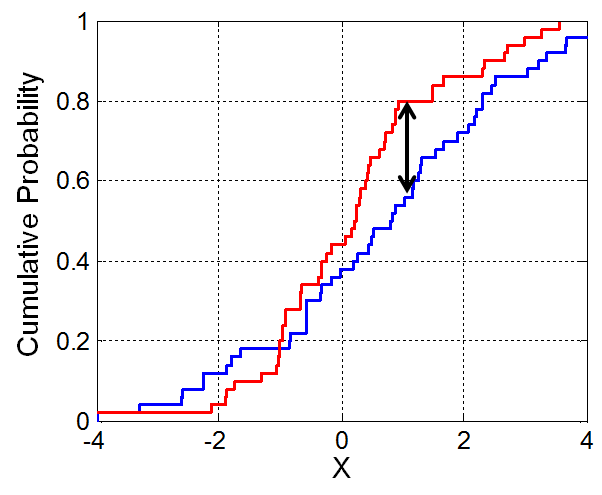


### Slide 9: (Untitled)

- 등분산 검정
- 전체 모집단의 분산이 같음
- 전체 모집단의 분산이 같지는 않음
- 모든 모집단이 정규분포를 따른다고 가정
- 두 개 이상의 모집단의 등분산성 검정
- 4
- Bartlett 검정
- 비모수 검정: Levene
- 검정통계량
- : 집단의 수
- : 전체 표본의 수
- : i 집단의 표본의 수
- 우측 꼬리 검정

**Equation 9.1**
$$
𝐻0 :
$$

**Equation 9.2**
$$
𝐻1 :
$$

**Equation 9.3**
$$
𝐵=𝑖=1𝑘𝑛𝑖−1ln𝑠2/𝑠𝑖21+13(𝑘−1)𝑖=1𝑘1𝑛𝑖−1−1𝑁−𝑘~𝜒2(𝑘−1)
$$

**Equation 9.4**
$$
𝑠2=𝑖=1𝑘(𝑛𝑖−1)𝑠𝑖2𝑖=1𝑘(𝑛𝑖−1)
$$

**Equation 9.5**
$$
𝑘
$$

**Equation 9.6**
$$
𝑁
$$

**Equation 9.7**
$$
𝑛𝑖
$$

**Equation 9.8**
$$
𝐵=𝑖=1𝑘𝑛𝑖−1ln𝑠2/𝑠𝑖21+13(𝑘−1)𝑖=1𝑘1𝑛𝑖−1−1𝑁−𝑘~𝜒2(𝑘−1)
$$

**Equation 9.9**
$$
𝑠2=𝑖=1𝑘(𝑛𝑖−1)𝑠𝑖2𝑖=1𝑘(𝑛𝑖−1)
$$

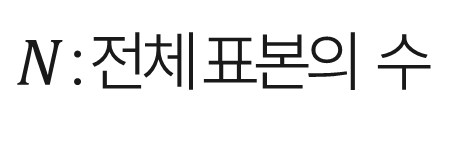
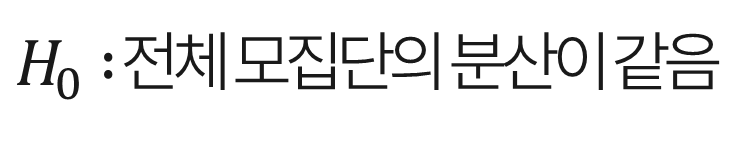
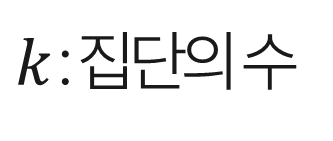
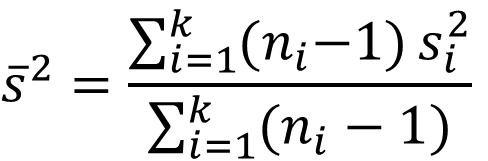
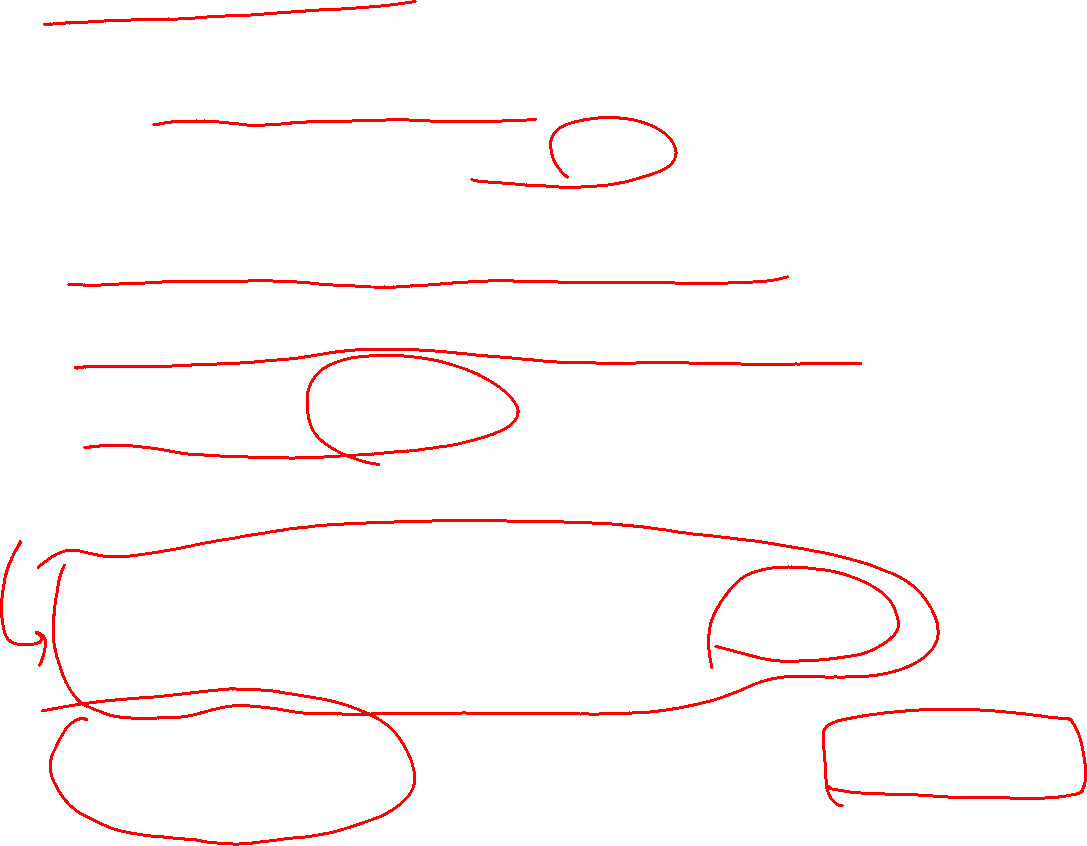
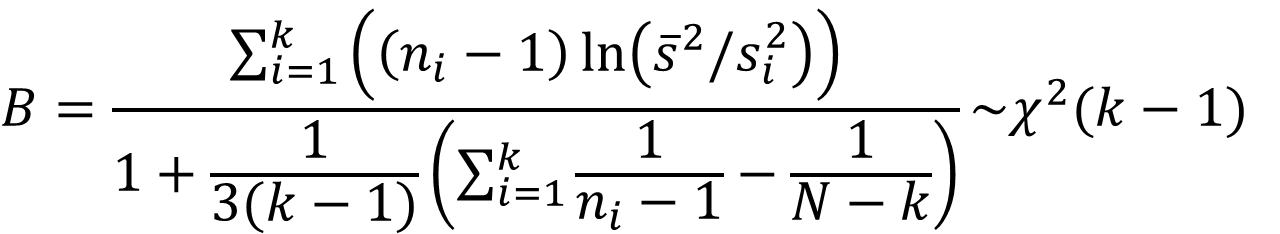
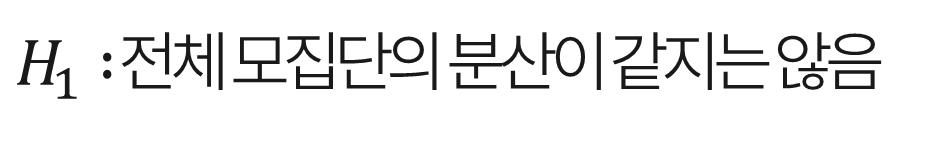
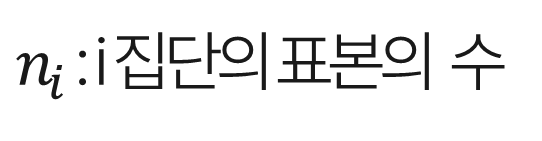


### Slide 10: (Untitled)

- Mann-Whitney U
- 특징
- 비모수적 검정 방법
- 두 집단 간의 값들의 경향성 분석
- 검정 통계량
- 5
- 두 모집단 간의 분포의 위치(중앙값)에 대한 검정
- 두 집단의 분포에 차이가 없음
- 집단 1 의 순위합
- 집단 2 의 순위합
- 집단 1 의 표본수
- 집단 2 의 표본수
- U 는 표본수가 커짐에 따라 정규분포에 수렴
- 소표본에서는 보다 강인한 permutation test 를,
- 대표본에서는 정규분포를 사용

**Equation 10.1**
$$
𝐻0 :
$$

**Equation 10.2**
$$
𝑈1=𝑅1−𝑚𝑚+12
$$

**Equation 10.3**
$$
𝑈2=𝑅2−𝑛𝑛+12
$$

**Equation 10.4**
$$
𝑅1:
$$

**Equation 10.5**
$$
𝑅2:
$$

**Equation 10.6**
$$
m :
$$

**Equation 10.7**
$$
n :
$$

**Equation 10.8**
$$
𝑈=min⁡(𝑈1,𝑈2)
$$

**Equation 10.9**
$$
𝑍=𝑈−𝑚𝑛2𝑚𝑛(𝑚+𝑛+1)12
$$

**Equation 10.10**
$$
𝑈1=𝑅1−𝑚𝑚+12
$$

**Equation 10.11**
$$
𝑈2=𝑅2−𝑛𝑛+12
$$

**Equation 10.12**
$$
𝑈=min⁡(𝑈1,𝑈2)
$$

**Equation 10.13**
$$
𝑍=𝑈−𝑚𝑛2𝑚𝑛(𝑚+𝑛+1)12
$$

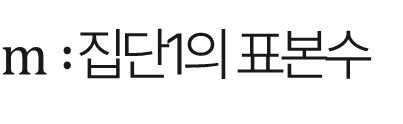
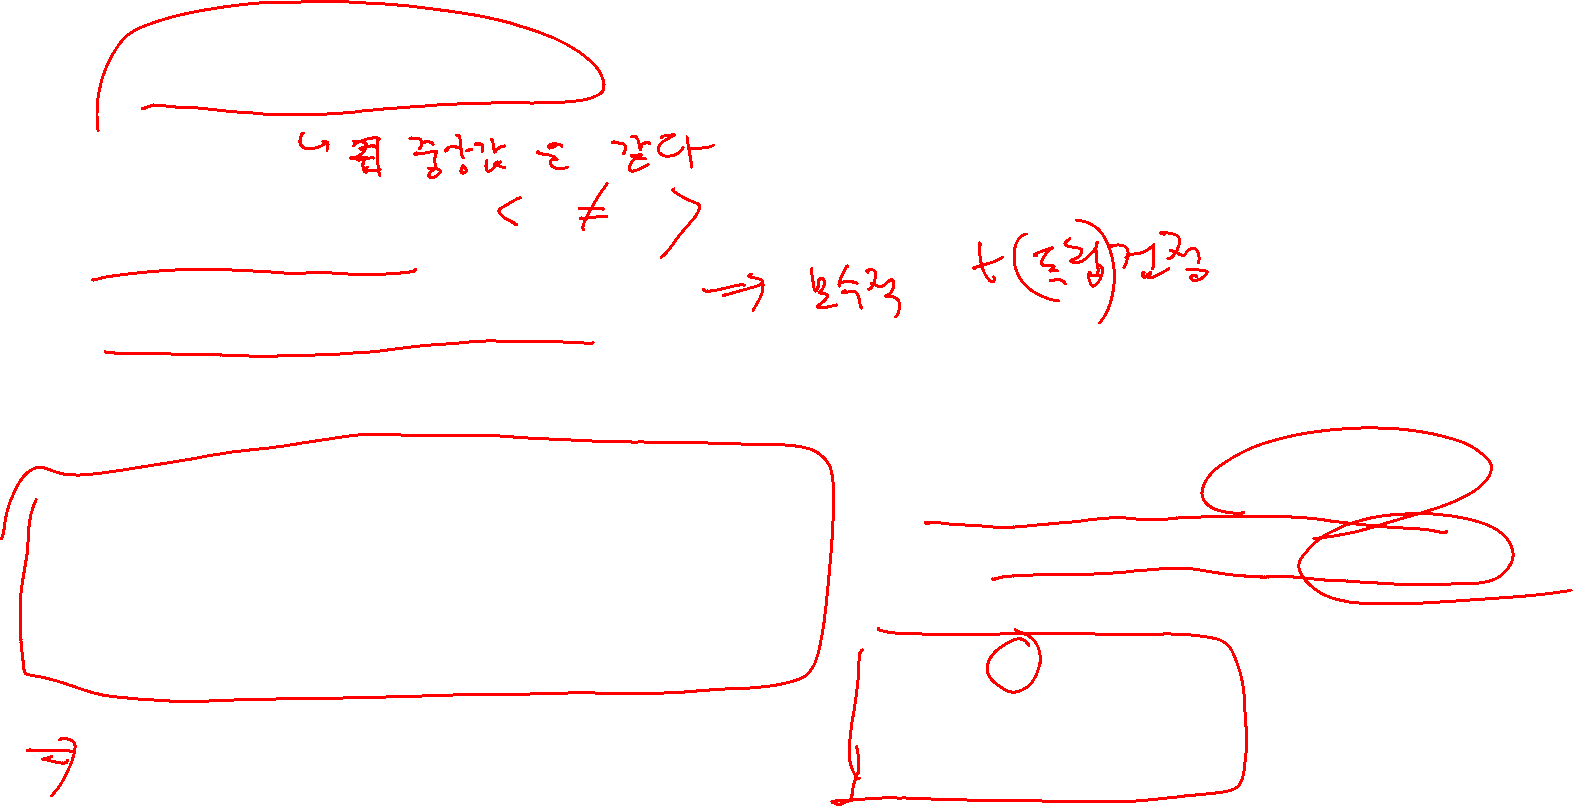
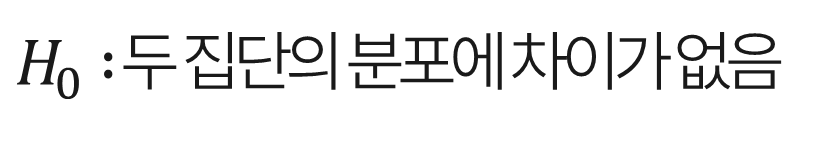
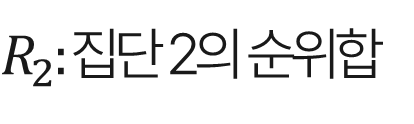
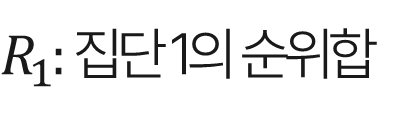
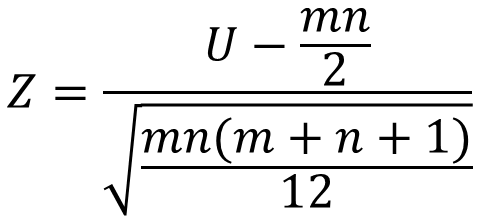
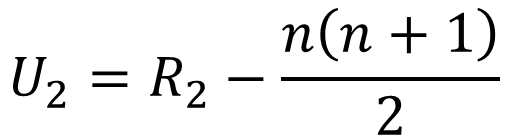
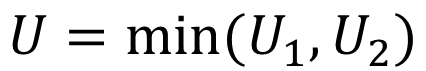
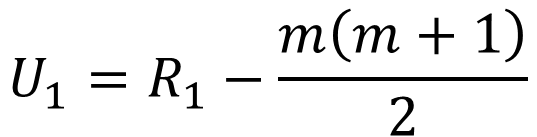
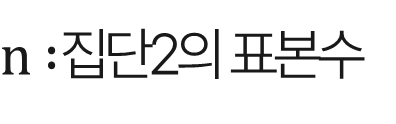


### Slide 11: (Untitled)

- Wilcoxon 부호 순위 검정
- 6
- 대응 관계의 두 모집단간의 분포의 위치(중앙값)에 대한 검정
- 대응 관계의 두 집단의 분포(또는 중앙값)에 차이가 없음
- 검정 통계량
- 특징
- 비모수적 검정 방법
- 두 집단 간의 값들의 경향성 분석
- 인 항목은 제외하고, 를 기준으 로 순위 부여
- 양의 부호 순위합
- 원래 부호(+/-)에 따라 순위 따라
- 음의 부호 순위합
- W 는 표본수가 커짐에 따라 정규분포에 수렴
- 소표본에서는 보다 강인한 permutation test,
- 대표본에서는 정규분포를 사용

**Equation 11.1**
$$
𝐻0 :
$$

**Equation 11.2**
$$
𝑑𝑖=𝑥𝑖−𝑦𝑖
$$

**Equation 11.3**
$$
𝑑𝑖=0
$$

**Equation 11.4**
$$
𝑑𝑖
$$

**Equation 11.5**
$$
𝑊+ :
$$

**Equation 11.6**
$$
𝑊− :
$$

**Equation 11.7**
$$
𝑊=min⁡(𝑊+,𝑊−)
$$

**Equation 11.8**
$$
𝑍=𝑈−𝑛(𝑛+1)4𝑛(𝑛+1)(2𝑛+1)24
$$

**Equation 11.9**
$$
𝑑𝑖=𝑥𝑖−𝑦𝑖
$$

**Equation 11.10**
$$
𝑊=min⁡(𝑊+,𝑊−)
$$

**Equation 11.11**
$$
𝑍=𝑈−𝑛(𝑛+1)4𝑛(𝑛+1)(2𝑛+1)24
$$

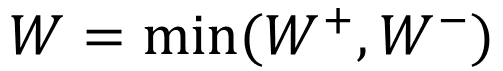
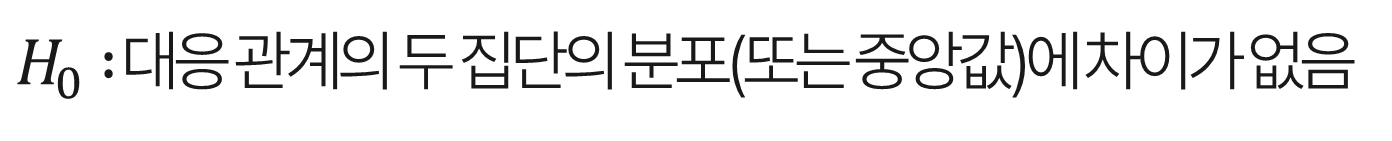
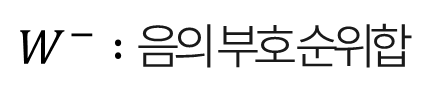
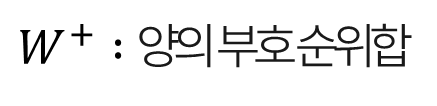
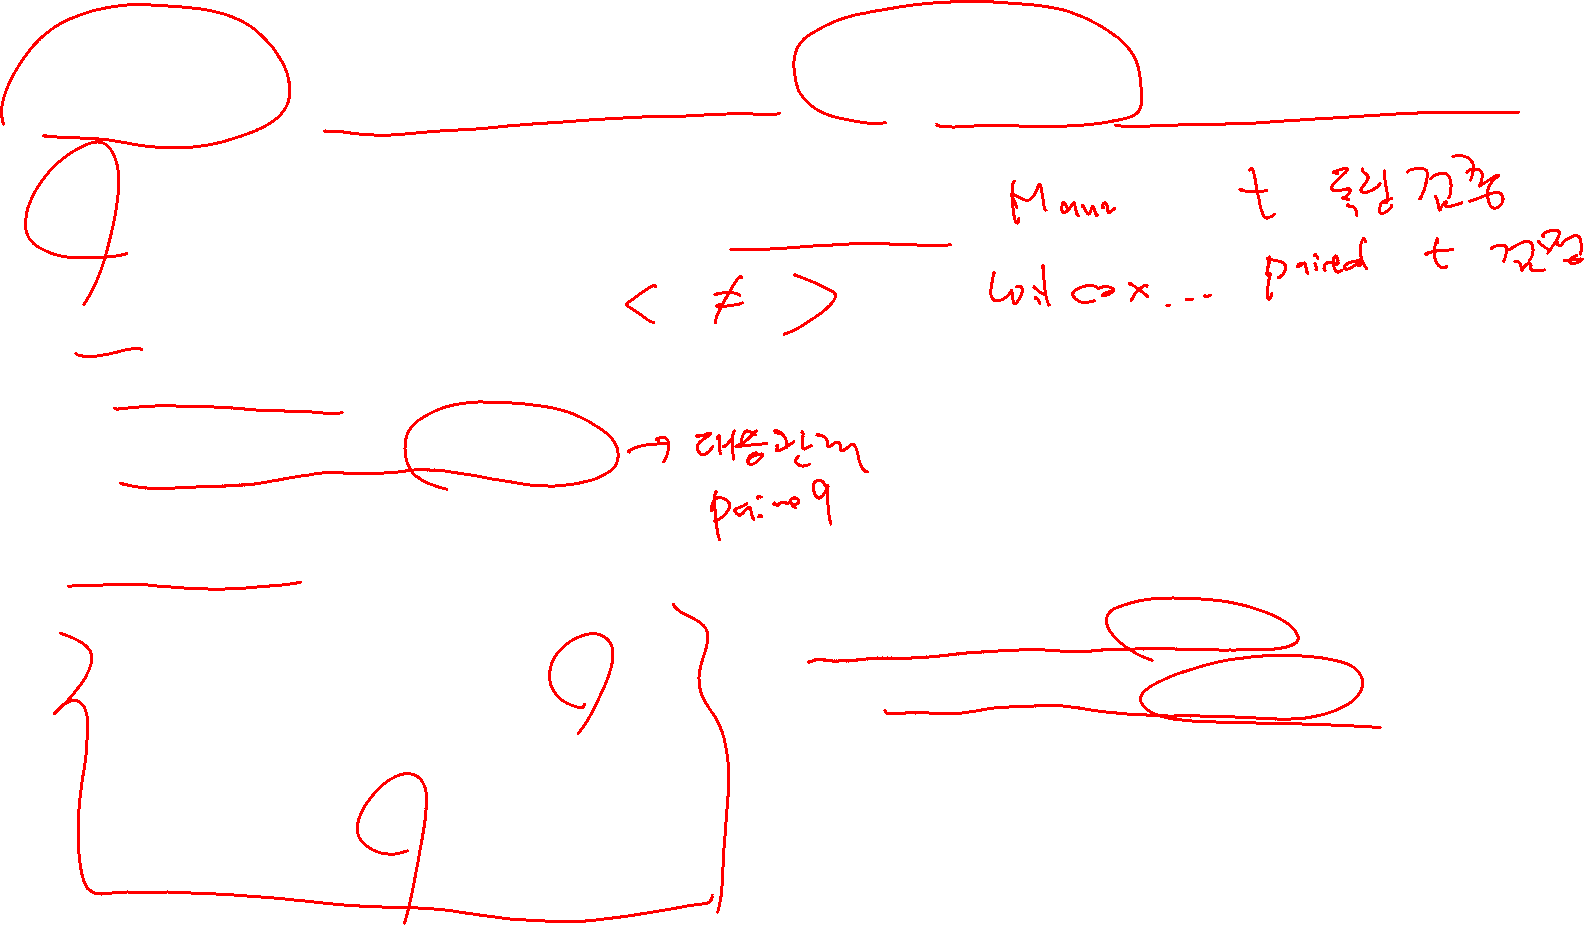
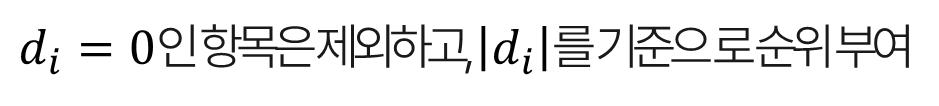
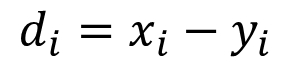
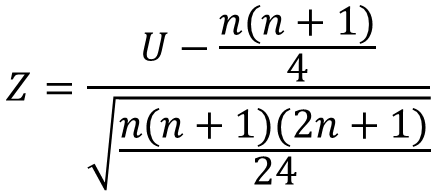


### Slide 12: (Untitled)

- 상관도 분석
- 7
- 분석 내용
- 두 변수 X,Y 간의 관계가 어느 방향(+ 또는 -)으로 함께 변화하는지를 수치로 표현
- 상관 관계의 유무를 가설 검정을 통해 도출
- 주의: 상관 관계 ≠ 인과 관계

**Equation 12.1**
$$
𝐻0: 𝑟=0
$$

**Equation 12.2**
$$
𝐻1: 𝑟≠0
$$

**Equation 12.3**
$$
𝐻0: 𝑟=0
$$

**Equation 12.4**
$$
𝐻1: 𝑟≠0
$$

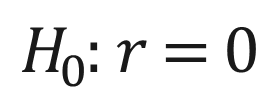
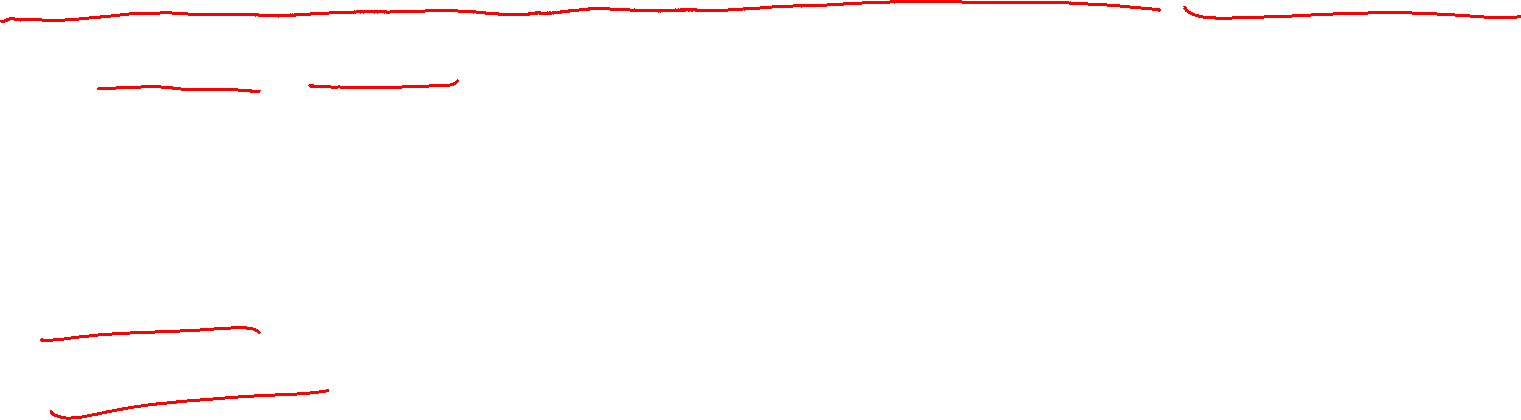
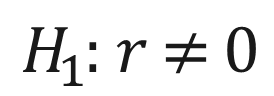


### Slide 13: (Untitled)

- 특징
- 상관도 분석
- 상관도
- 가설 검정
- 이상치에 민감
- 비선형 관계를 포착하지 못함
- 가정: X, Y 는 이변량 정규분포를 따름
- 검정통계량
- 7
- 피어슨(Pearson) 상관도 분석

**Equation 13.1**
$$
𝑡=𝑟𝑛−21−𝑟2~𝑡(𝑛−2)
$$

**Equation 13.2**
$$
𝑟=𝑖=1𝑛(𝑥𝑖−𝑋)(𝑦𝑖−𝑌)𝑖=1𝑛𝑥𝑖−𝑋2𝑖=1𝑛𝑦𝑖−𝑌2
$$

**Equation 13.3**
$$
𝑡=𝑟𝑛−21−𝑟2~𝑡(𝑛−2)
$$

**Equation 13.4**
$$
𝑟=𝑖=1𝑛(𝑥𝑖−𝑋)(𝑦𝑖−𝑌)𝑖=1𝑛𝑥𝑖−𝑋2𝑖=1𝑛𝑦𝑖−𝑌2
$$

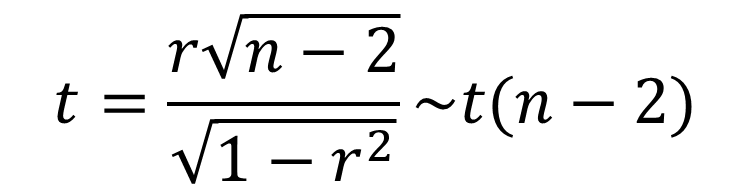
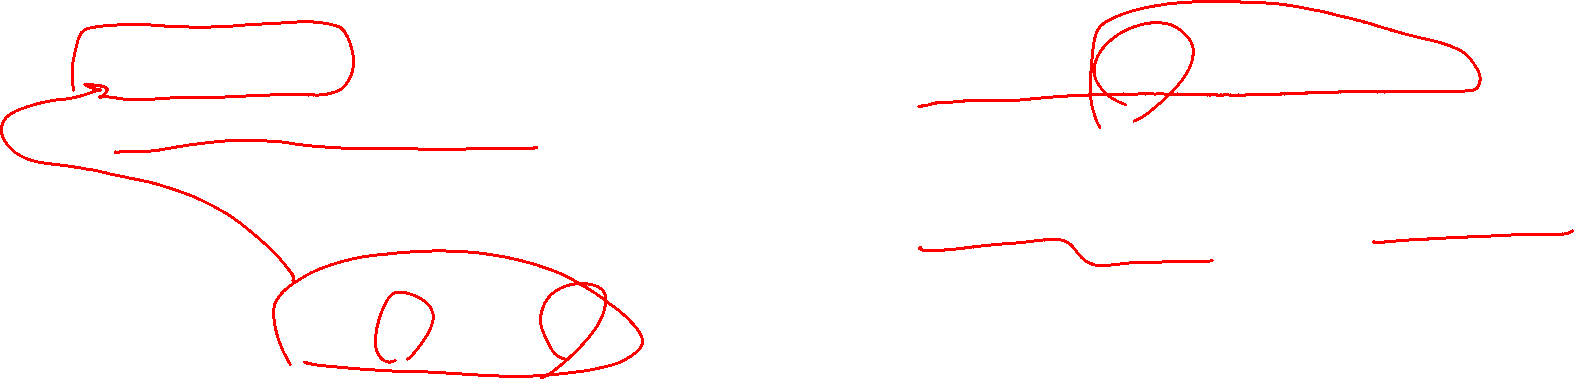
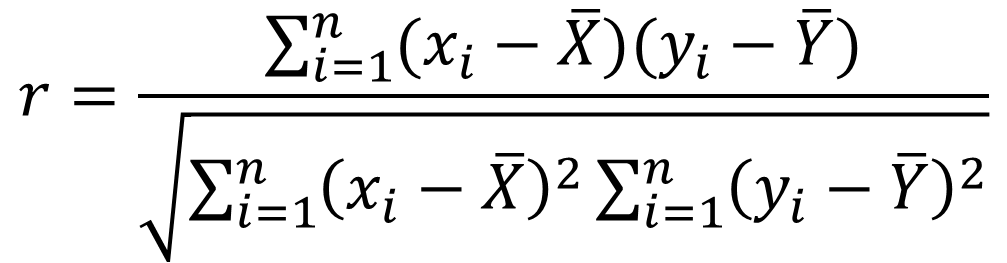


### Slide 14: (Untitled)

- 상관도 분석
- : X 와 Y 의 순위
- 동점 순위가 없다면,
- 통계량은 근사화한 결과이므로
- 소표본에서는 보다 강인한
- permuation test 와 같은 방법을 사용
- 특징
- 상관도
- 피어슨 상관도에 비해 이상치에 덜 민감
- 비선형 관계라도 단조 관계는 포착 가능
- 7
- 스피어만(Spearman) 상관도 분석
- 가설 검정

**Equation 14.1**
$$
𝑟𝑠=𝑃𝑒𝑎𝑟𝑠𝑜𝑛(𝑅𝑋,𝑅𝑌)
$$

**Equation 14.2**
$$
𝑅𝑋, 𝑅𝑌
$$

**Equation 14.3**
$$
𝑡
$$

**Equation 14.4**
$$
𝑡=𝑟𝑠𝑛−21−𝑟𝑠2~𝑡(𝑛−2)
$$

**Equation 14.5**
$$
𝑟𝑠=1−6𝑖=1𝑛𝑑𝑖2𝑛(𝑛2−1)
$$

**Equation 14.6**
$$
𝑟𝑠=𝑃𝑒𝑎𝑟𝑠𝑜𝑛(𝑅𝑋,𝑅𝑌)
$$

**Equation 14.7**
$$
𝑡=𝑟𝑠𝑛−21−𝑟𝑠2~𝑡(𝑛−2)
$$

**Equation 14.8**
$$
𝑟𝑠=1−6𝑖=1𝑛𝑑𝑖2𝑛(𝑛2−1)
$$

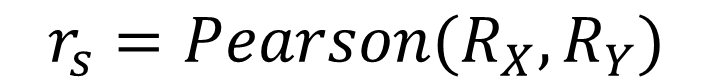
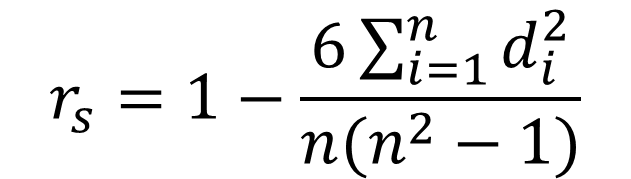
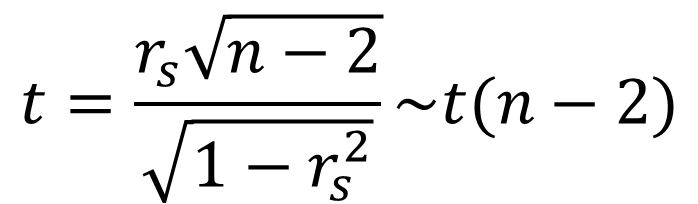
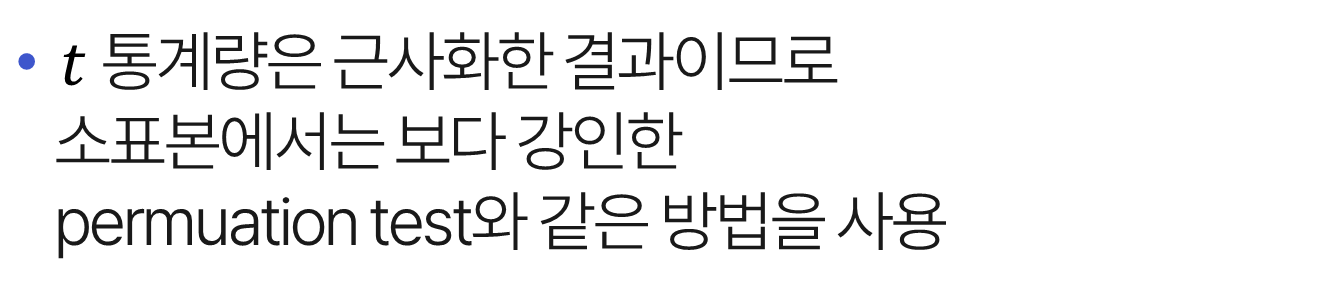
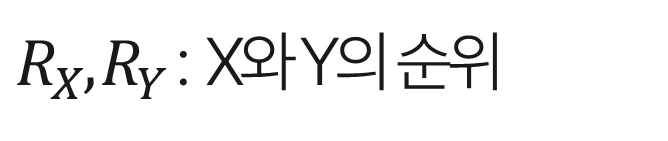
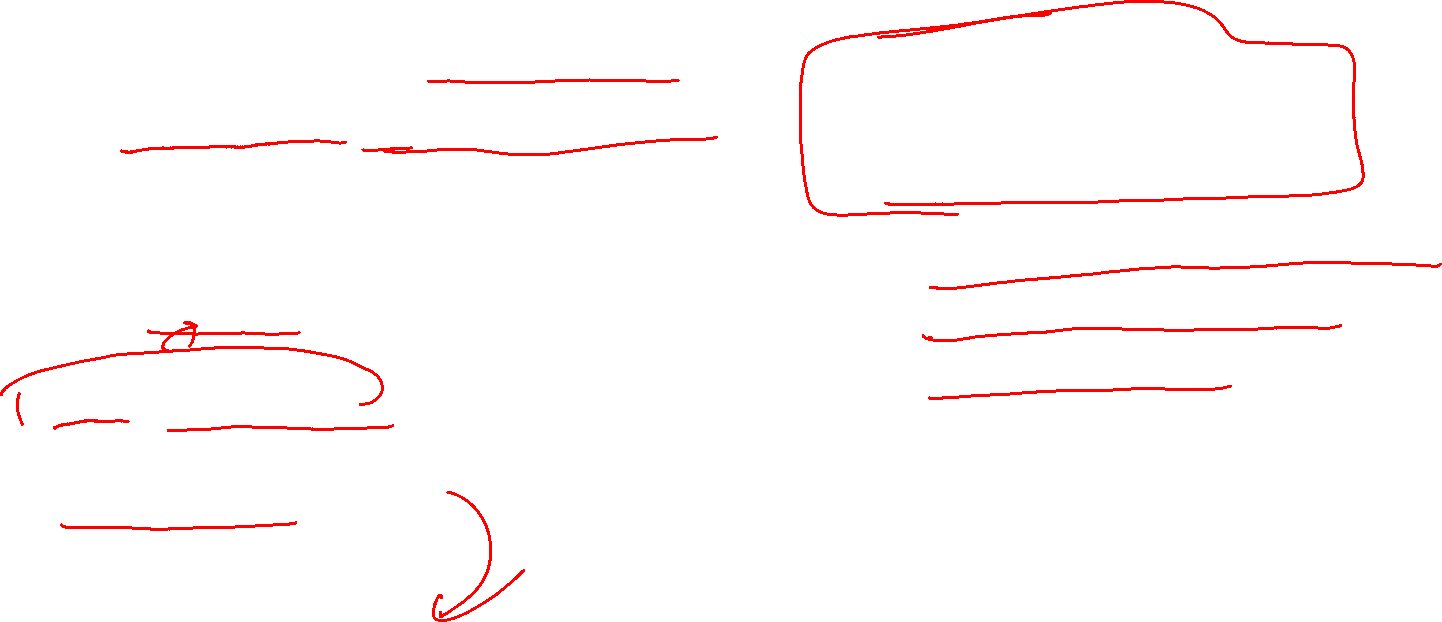


### Slide 15: (Untitled)

- 상관도 분석
- C: 일치(Concordant)한 경우의 수
- D: 불일치(Discordant)한 경우의 수
- 근사적 정규분포
- 소표본에서는 보다 정확한 permuation test 와
- 같은 방법을 사용
- 7
- 켄달의 순위 상관계수
- 스피어만보다 이상치에 더 강건, 작은 데이터에서도 안정적
- 큰 데이터에서 느림: 시간 복잡도:
- 특징
- 상관도
- : 모든 가능한 두 변수의 대소 비교 결과를 통해 도출
- 경우의 수
- 가설 검정

**Equation 15.1**
$$
𝑂(𝑛2)
$$

**Equation 15.2**
$$
𝑛2=12𝑛(𝑛−1)
$$

**Equation 15.3**
$$
𝜏=𝐶−𝐷12𝑛(𝑛−1)
$$

**Equation 15.4**
$$
𝜏~𝑁0,22𝑛+59𝑛𝑛−1
$$

**Equation 15.5**
$$
𝜏=𝐶−𝐷12𝑛(𝑛−1)
$$

**Equation 15.6**
$$
𝜏~𝑁0,22𝑛+59𝑛𝑛−1
$$

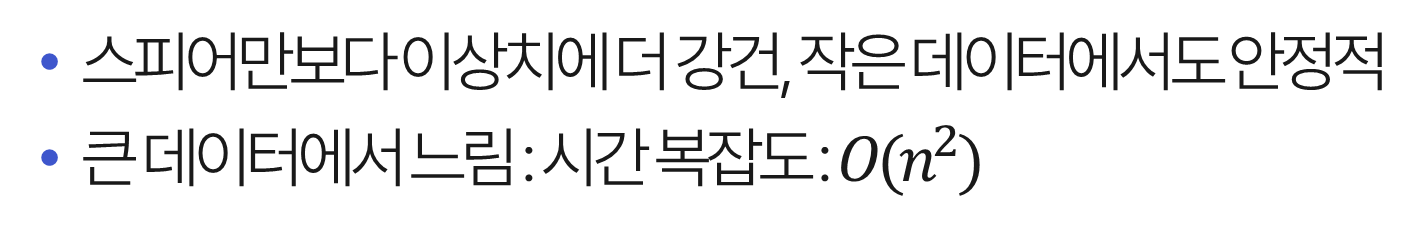
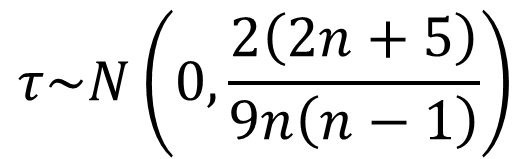
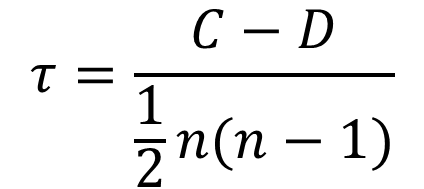
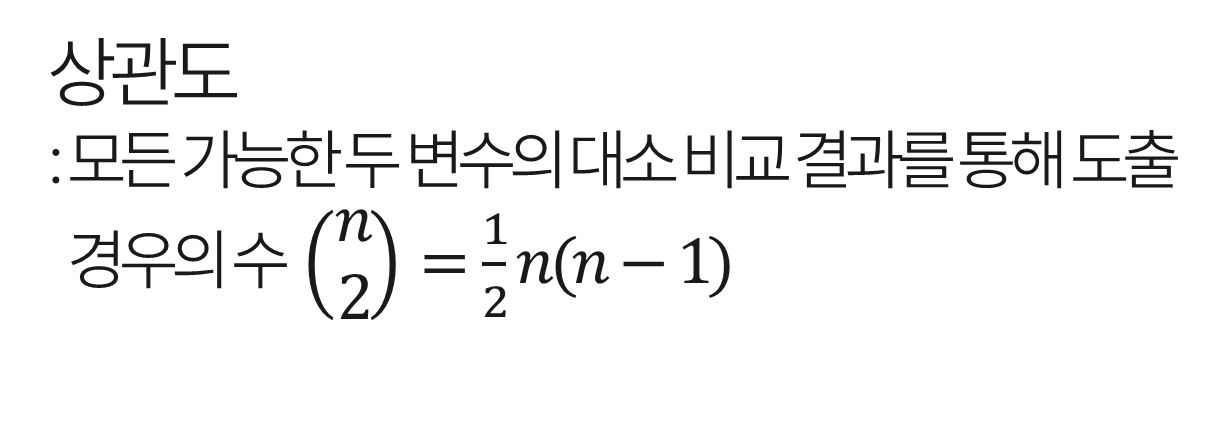
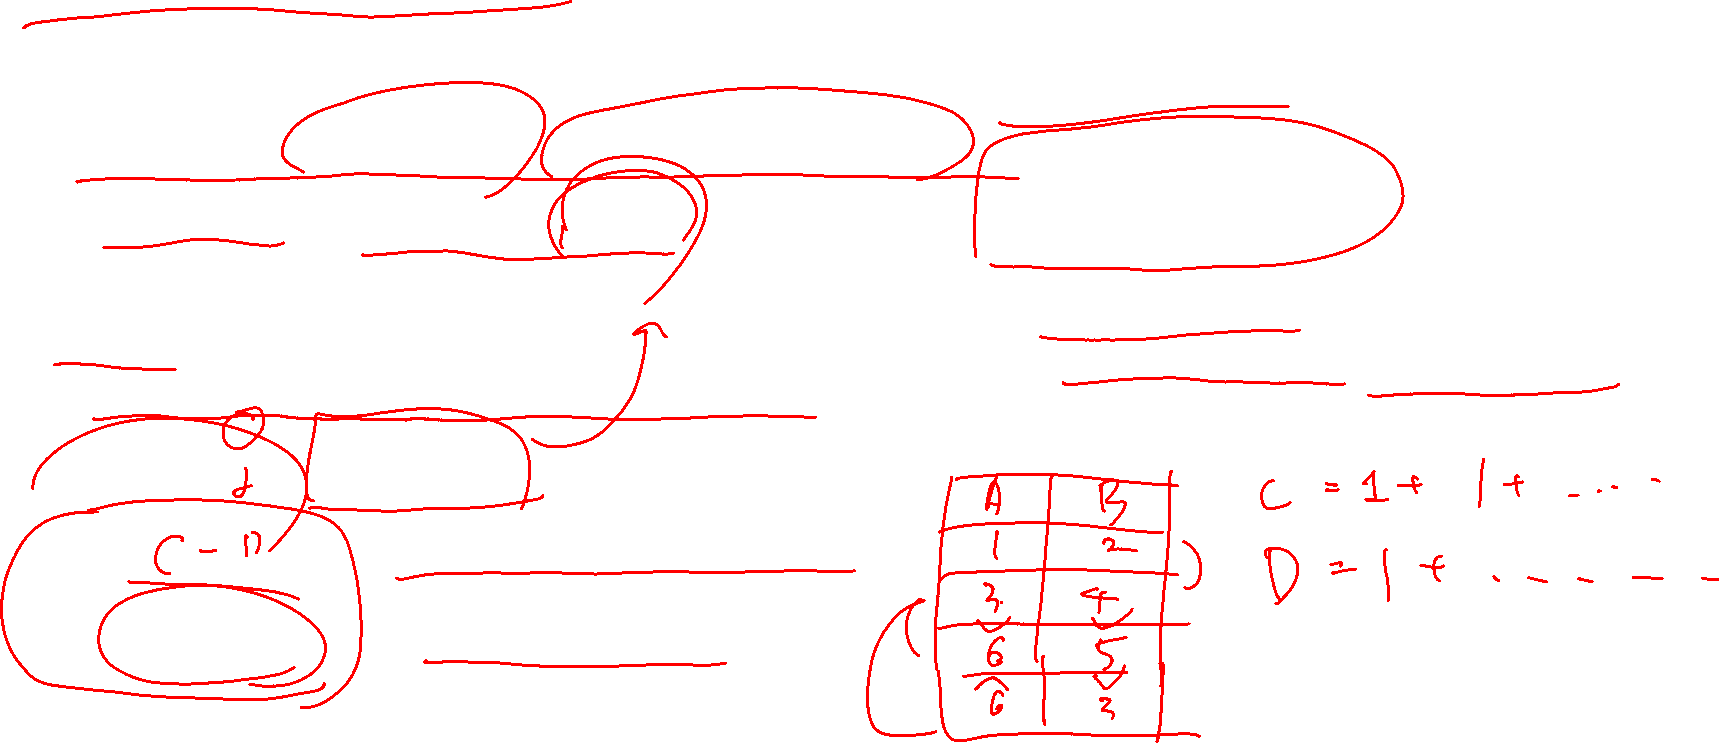


### Slide 16: (Untitled)

- 분산분석
- 모든 집단의 평균은 같음
- 적어도 하나의 집단의 평균은 다름
- : 집단의 수
- : 표본의 수
- 검정통계량
- 가정
- 각각의 모집단의 분산은 같음
- 각각의 모집단은 정규분포를 따름
- 정규방정식 으로 추정된
- 선형 회귀 모델 과 대응되는 개념
- 집단의 구분 기준: 범주형 변수
- 8
- 분석 내용
- 셋 이상의 모집단의 모평균의 차이를 검정

**Equation 16.1**
$$
𝐹=𝑀𝑆𝑅𝑀𝑆𝐸=𝑆𝑆𝑅/(𝑘−1)𝑆𝑆𝐸/(𝑛−𝑘)
$$

**Equation 16.2**
$$
𝑘
$$

**Equation 16.3**
$$
𝑛
$$

**Equation 16.4**
$$
𝐻1:𝜇1≠𝜇2 𝑜𝑟𝜇1≠𝜇3 𝑜𝑟 …𝑜𝑟 𝜇𝑘−1≠𝜇𝑘
$$

**Equation 16.5**
$$
𝐻0:𝜇1=𝜇2=…=𝜇𝑘
$$

**Equation 16.6**
$$
𝐹=𝑀𝑆𝑅𝑀𝑆𝐸=𝑆𝑆𝑅/(𝑘−1)𝑆𝑆𝐸/(𝑛−𝑘)
$$

**Equation 16.7**
$$
𝐻1:𝜇1≠𝜇2 𝑜𝑟𝜇1≠𝜇3 𝑜𝑟 …𝑜𝑟 𝜇𝑘−1≠𝜇𝑘
$$

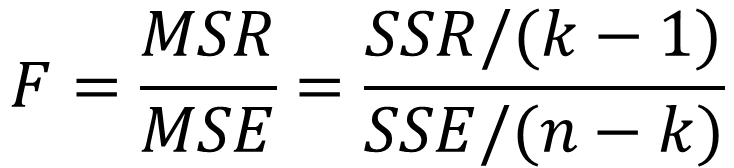
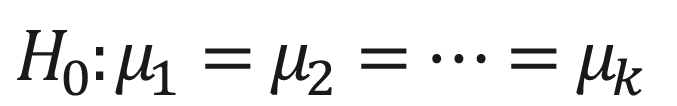
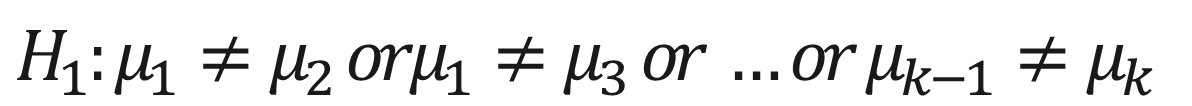
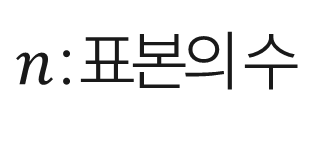
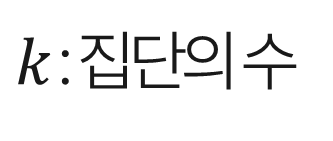
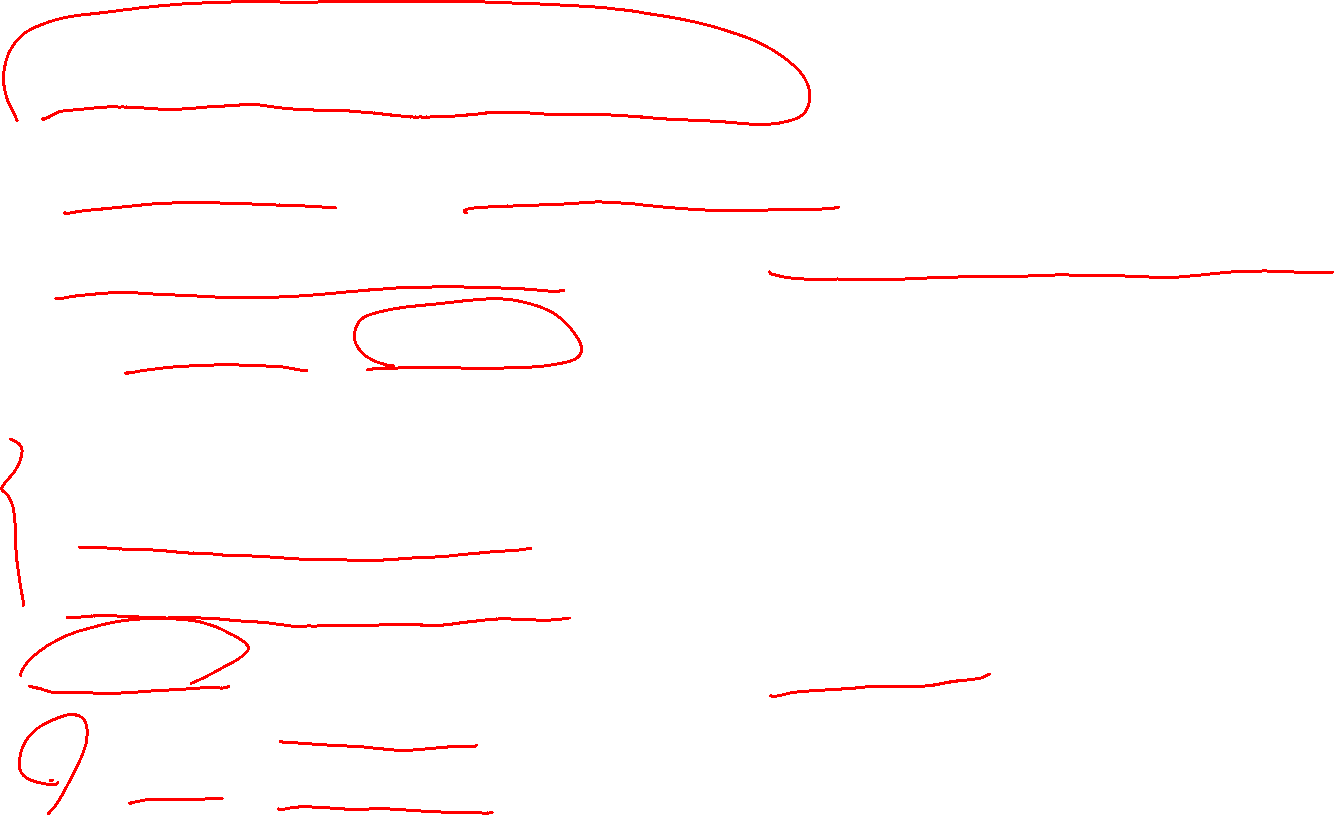


### Slide 17: (Untitled)

- 분산분석
- : 범주 에 속한 번째 관측값
- : 범주 의 예측값
- 8
- 정규방정식과 분산분석
- 그룹별 종속변수의 평균으로 예측하는 것
- = 정규방정식으로 추정된 선형 회귀 모델로 예측하는 것

**Equation 17.1**
$$
𝑦𝑖𝑗=𝑎𝑗+𝑒𝑖𝑗
$$

**Equation 17.2**
$$
𝑦𝑖𝑗
$$

**Equation 17.3**
$$
𝑗
$$

**Equation 17.4**
$$
𝑖
$$

**Equation 17.5**
$$
𝑎𝑗
$$

**Equation 17.6**
$$
𝑗
$$

**Equation 17.7**
$$
𝜕𝑆𝑆𝐸𝜕𝑎𝑗 =𝑖=1𝑛𝑗−2(𝑦𝑖𝑗−𝑎𝑗)=0
$$

**Equation 17.8**
$$
𝑎𝑗=𝑖=1𝑛𝑗𝑦𝑖𝑗𝑛𝑗
$$

**Equation 17.9**
$$
𝑆𝑆𝐸=𝑗=1𝑔𝑖=1𝑛𝑗𝑦𝑖𝑗−𝑎𝑗2
$$

**Equation 17.10**
$$
𝑆𝑆𝑅=𝑗=1𝑔𝑖=1𝑛𝑗𝑎𝑗−𝑦2=𝑗=1𝑔𝑛𝑗𝑎𝑗−𝑦2
$$

**Equation 17.11**
$$
𝑆𝑆𝑇=𝑆𝑆𝑅+𝑆𝑆𝐸
$$

**Equation 17.12**
$$
𝑦𝑖𝑗=𝑎𝑗+𝑒𝑖𝑗
$$

**Equation 17.13**
$$
𝜕𝑆𝑆𝐸𝜕𝑎𝑗 =𝑖=1𝑛𝑗−2(𝑦𝑖𝑗−𝑎𝑗)=0
$$

**Equation 17.14**
$$
𝑎𝑗=𝑖=1𝑛𝑗𝑦𝑖𝑗𝑛𝑗
$$

**Equation 17.15**
$$
𝑆𝑆𝐸=𝑗=1𝑔𝑖=1𝑛𝑗𝑦𝑖𝑗−𝑎𝑗2
$$

**Equation 17.16**
$$
𝑆𝑆𝑅=𝑗=1𝑔𝑖=1𝑛𝑗𝑎𝑗−𝑦2=𝑗=1𝑔𝑛𝑗𝑎𝑗−𝑦2
$$

**Equation 17.17**
$$
𝑆𝑆𝑇=𝑆𝑆𝑅+𝑆𝑆𝐸
$$

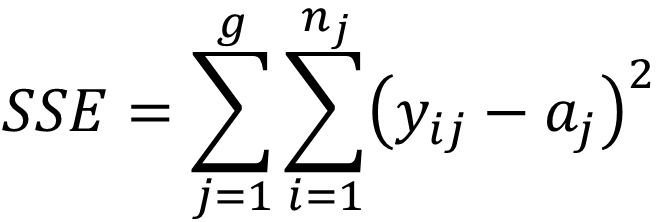
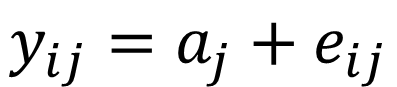
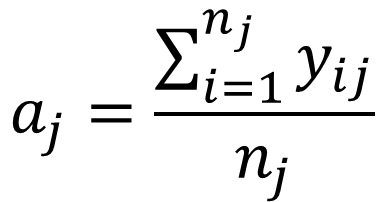
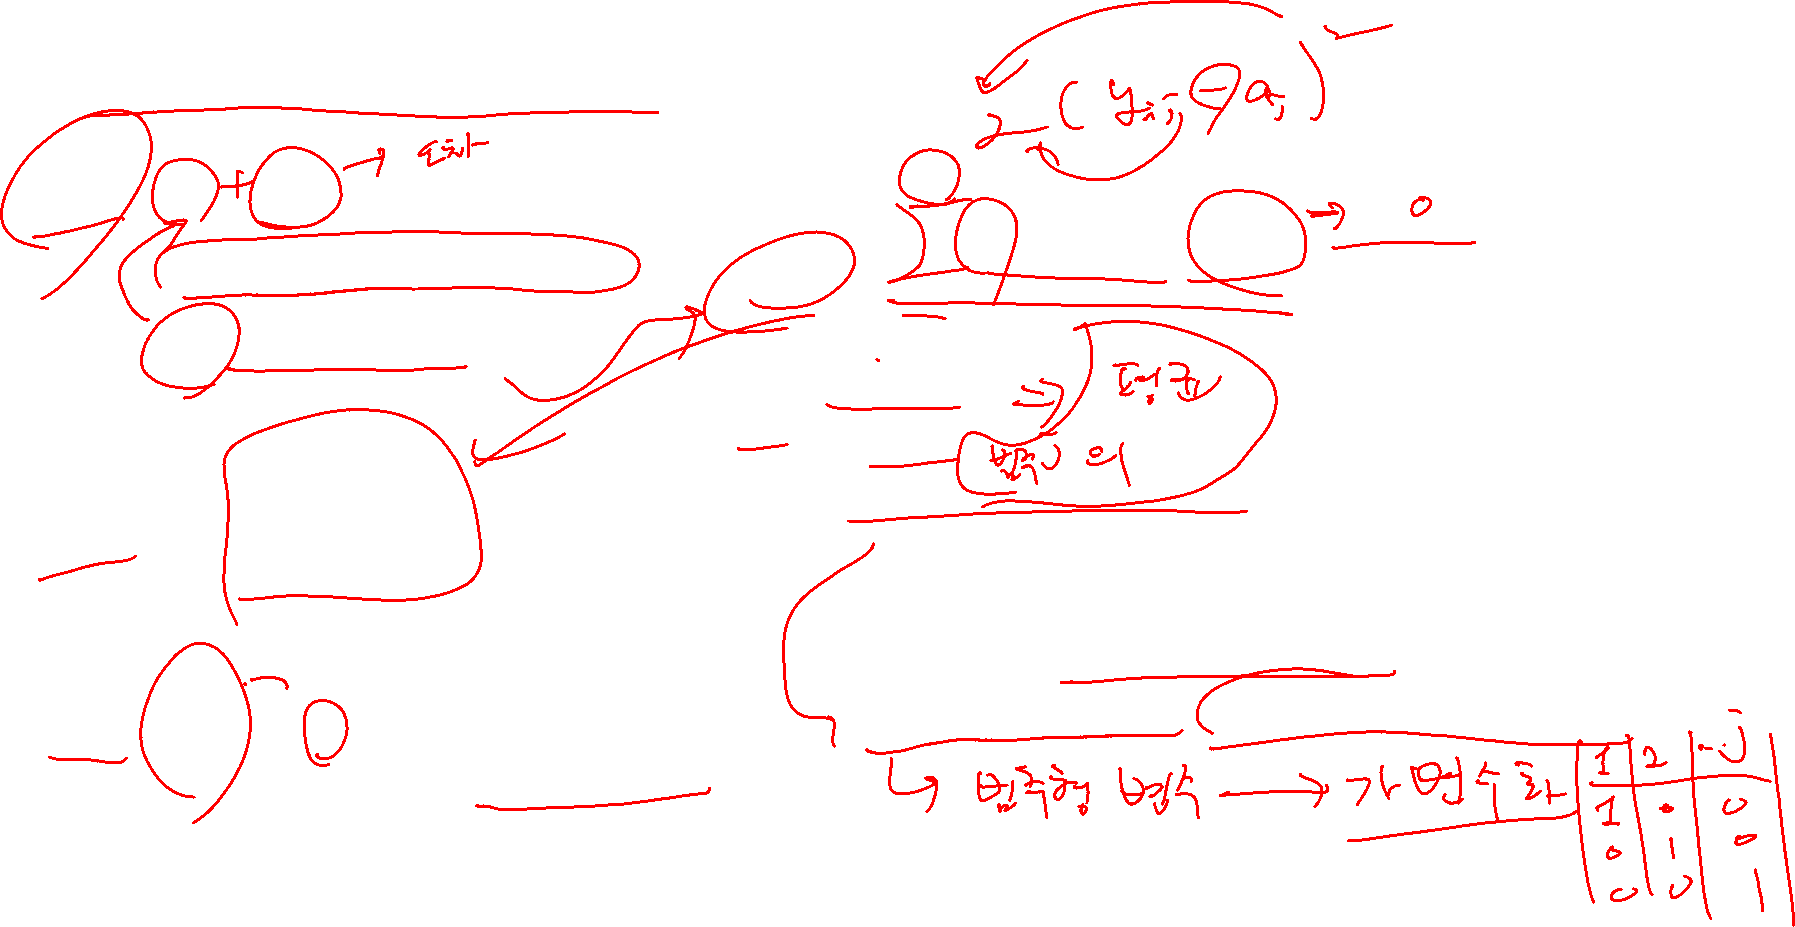
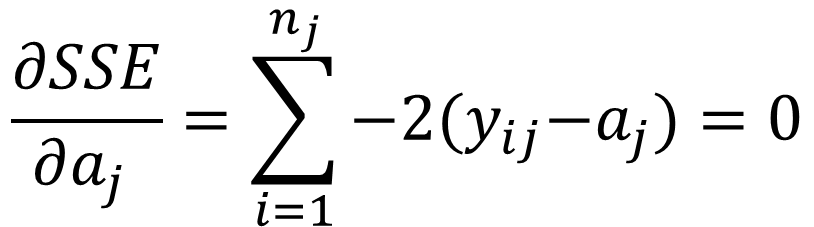
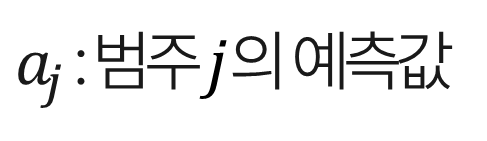
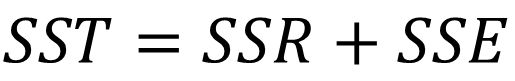
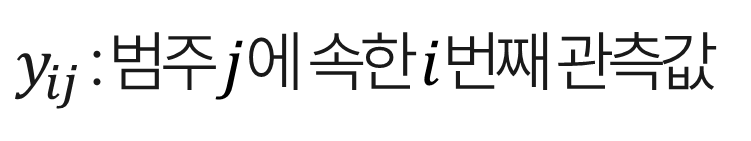
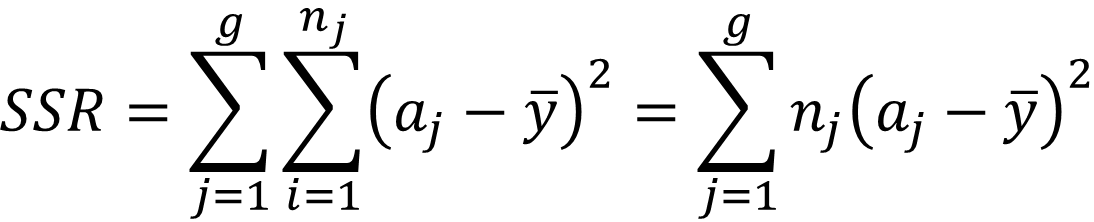


### Slide 18: (Untitled)

- 분산분석
- 8
- 선형회귀모델의 유의미성 검정
- (선형회귀모델은 무의미)
- (선형회귀모델은 유의미)
- 모든 집단의 평균은 같음
- 적어도 하나의 집단의 평균은 다름
- : 집단의 수
- : 표본의 수
- 분산 분석의 비모수 검정법: Kruskal-Wallis

**Equation 18.1**
$$
𝐻0:𝛽1=𝛽2=…=𝛽𝑝=0
$$

**Equation 18.2**
$$
𝐻1:𝛽1≠0 𝑜𝑟 𝛽2≠0 𝑜𝑟…𝛽𝑝≠0
$$

**Equation 18.3**
$$
𝐹=𝑀𝑆𝑅𝑀𝑆𝐸=𝑆𝑆𝑅/(𝑘−1)𝑆𝑆𝐸/(𝑛−𝑘)
$$

**Equation 18.4**
$$
𝑘
$$

**Equation 18.5**
$$
𝑛
$$

**Equation 18.6**
$$
𝐻0:𝛽1=𝛽2=…=𝛽𝑝=0
$$

**Equation 18.7**
$$
𝐻1:𝛽1≠0 𝑜𝑟 𝛽2≠0 𝑜𝑟…𝛽𝑝≠0
$$

**Equation 18.8**
$$
𝐹=𝑀𝑆𝑅𝑀𝑆𝐸=𝑆𝑆𝑅/(𝑘−1)𝑆𝑆𝐸/(𝑛−𝑘)
$$

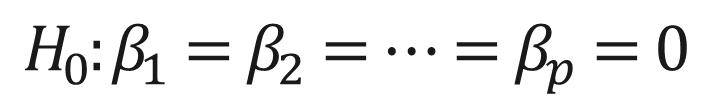
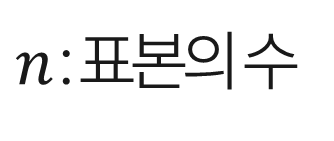
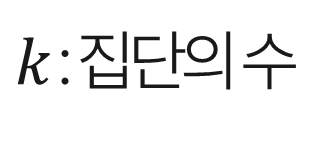
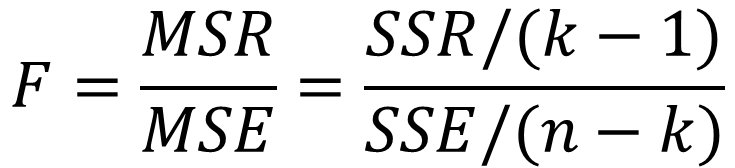
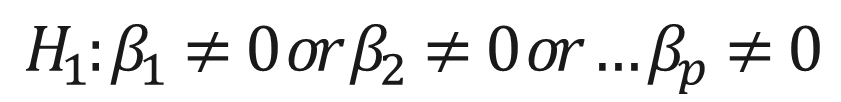
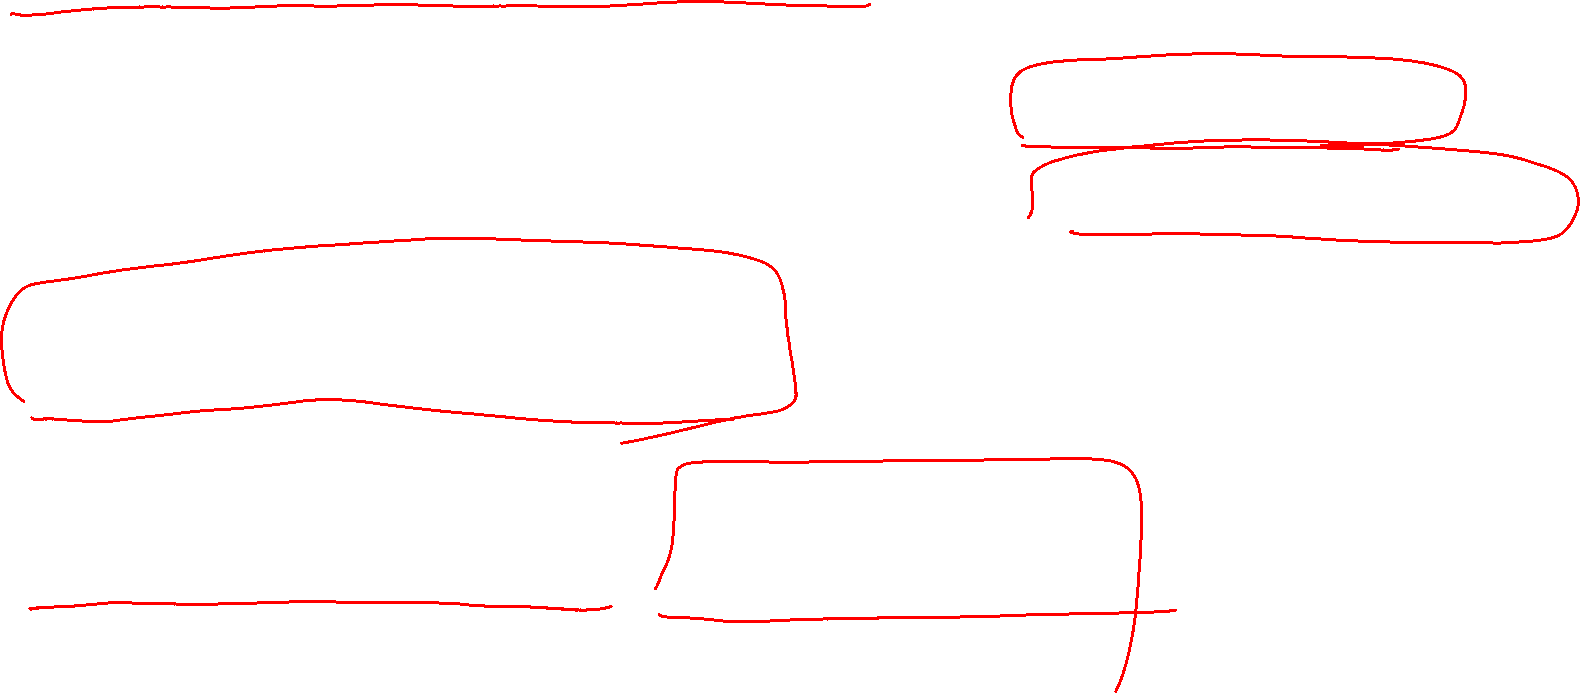


### Slide 19: (Untitled)

- 분산분석
- 상호작용(교호작용)
- 8
- 이원분산분석

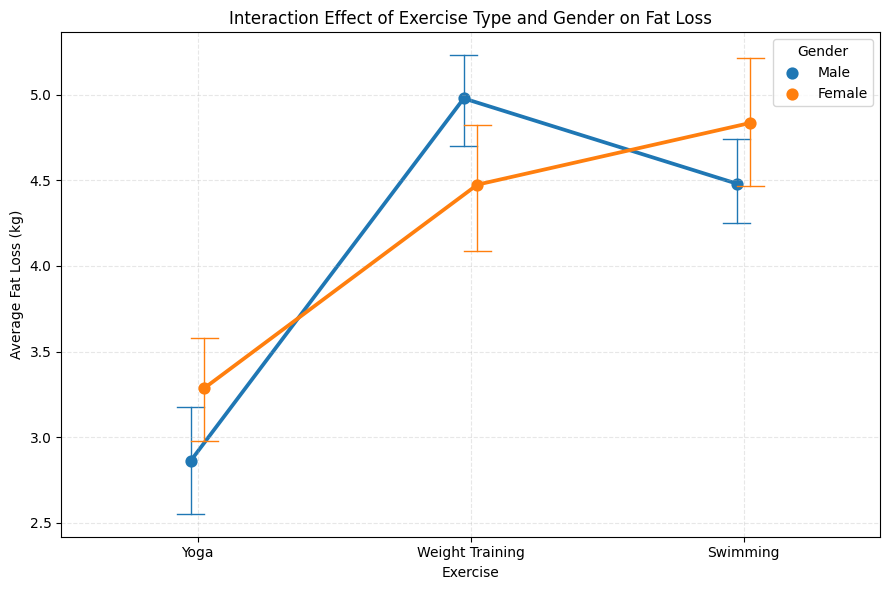
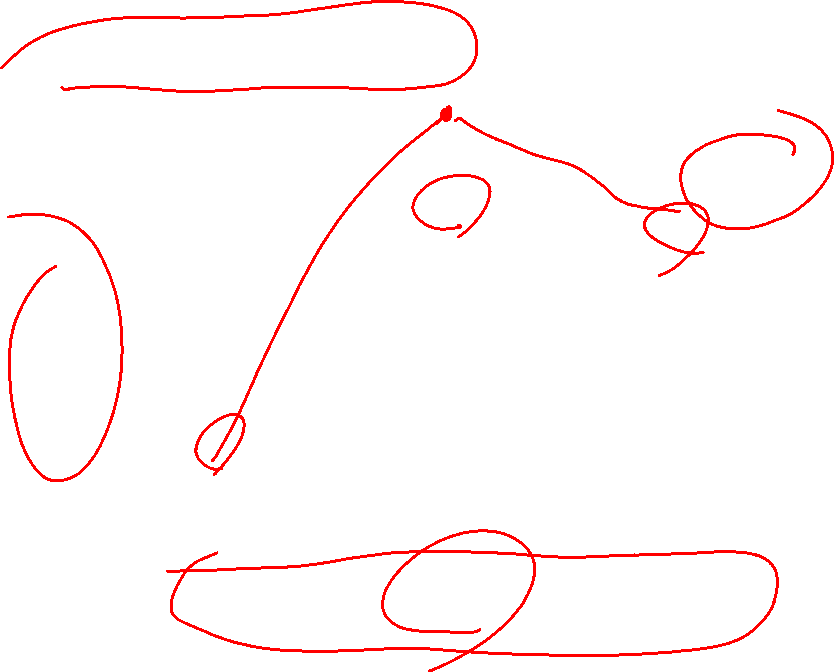


### Slide 20: (Untitled)

- 분산분석
- 8
- 이원분산분석
- 두 개의 범주형 변수와 상호작용(교호)항의 선형회귀모델과 대응

**Equation 20.1**
$$
𝑆𝑆𝑇=𝑆𝑆𝑅+𝑆𝑆𝐸
$$

**Equation 20.2**
$$
𝑆𝑆𝑅=𝑆𝑆𝐴+𝑆𝑆𝐵+𝑆𝑆𝐴𝐵
$$

**Equation 20.3**
$$
𝑆𝑆𝐴=𝑗=1𝑔𝑎𝑛𝑎𝑗𝑎𝑗−𝑦2
$$

**Equation 20.4**
$$
𝑆𝑆𝐵=𝑗=1𝑔𝑏𝑛𝑏𝑗𝑏𝑗−𝑦2
$$

**Equation 20.5**
$$
𝑆𝑆𝐴𝐵=𝑖=1𝑔𝑎𝑗=1𝑔𝑏𝑛𝑎𝑏𝑖𝑗𝑎𝑏𝑖𝑗−𝑦𝑖𝑗2
$$

**Equation 20.6**
$$
𝑦𝑖𝑗=𝑦+𝑎𝑖−𝑦+𝑏𝑗−𝑦=𝑎𝑗+𝑏𝑗−𝑦
$$

**Equation 20.7**
$$
𝑆𝑆𝑇=𝑆𝑆𝑅+𝑆𝑆𝐸
$$

**Equation 20.8**
$$
𝑆𝑆𝑅=𝑆𝑆𝐴+𝑆𝑆𝐵+𝑆𝑆𝐴𝐵
$$

**Equation 20.9**
$$
𝑆𝑆𝐴=𝑗=1𝑔𝑎𝑛𝑎𝑗𝑎𝑗−𝑦2
$$

**Equation 20.10**
$$
𝑆𝑆𝐵=𝑗=1𝑔𝑏𝑛𝑏𝑗𝑏𝑗−𝑦2
$$

**Equation 20.11**
$$
𝑆𝑆𝐴𝐵=𝑖=1𝑔𝑎𝑗=1𝑔𝑏𝑛𝑎𝑏𝑖𝑗𝑎𝑏𝑖𝑗−𝑦𝑖𝑗2
$$

**Equation 20.12**
$$
𝑦𝑖𝑗=𝑦+𝑎𝑖−𝑦+𝑏𝑗−𝑦=𝑎𝑗+𝑏𝑗−𝑦
$$

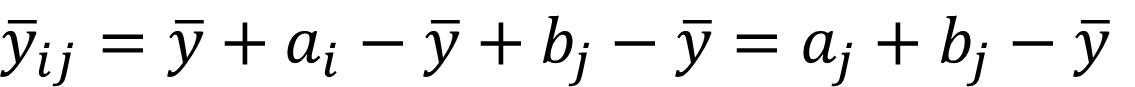
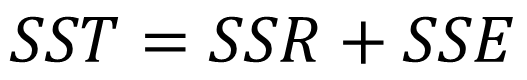
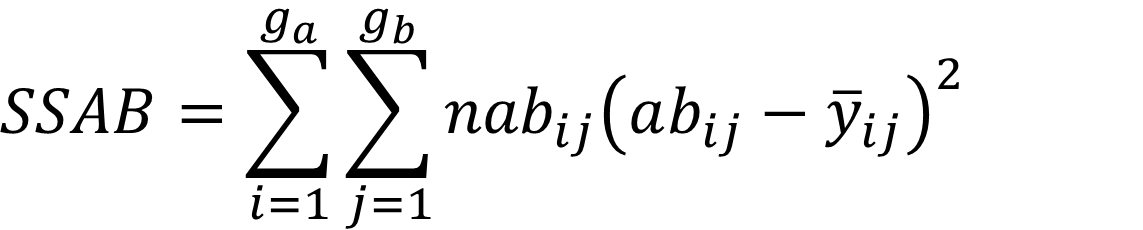
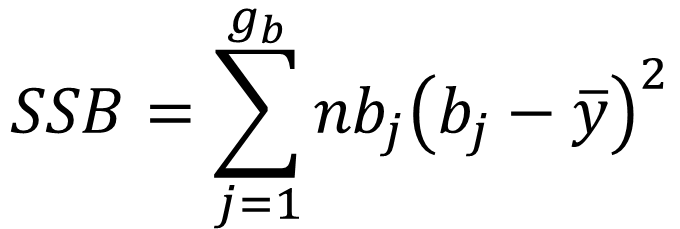
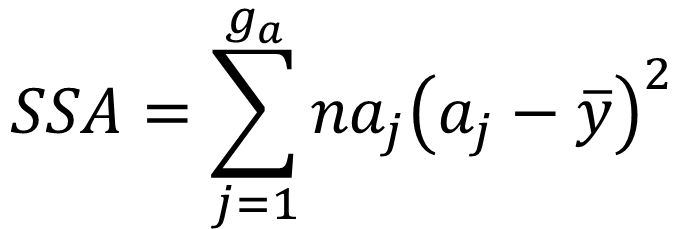
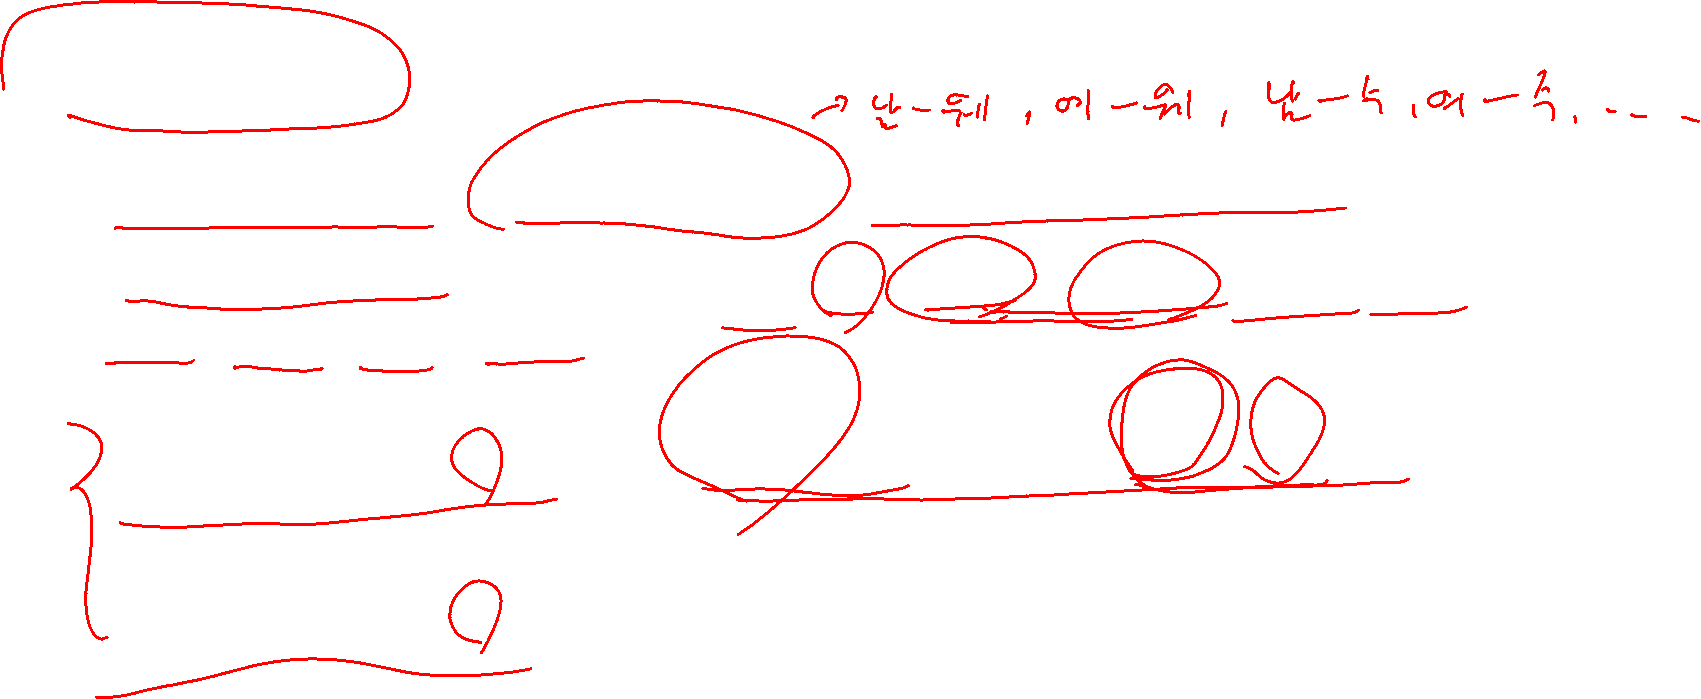
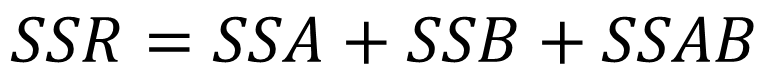


### Slide 21: (Untitled)

- 분산분석
- 8
- 이원 분산 분석 테이블
- 요인
- 제곱합
- 자유도
- 평균제곱
- F
- A
- B
- A×B
- 오차(Error)
- 전체(Total)
- 요인
- 제곱합
- 자유도
- 평균제곱
- F
- A
- B
- A×B
- 오차(Error)
- 전체(Total)

**Table 21.1**
| 요인 | 제곱합 | 자유도 | 평균제곱 | F |
| --- | --- | --- | --- | --- |
| A |   |   |   |   |
| B |   |   |   |   |
| A×B |   |   |   |   |
| 오차(Error) |   |   |   |   |
| 전체(Total) |   |   |   |   |

**Table 21.2**
| 요인 | 제곱합 | 자유도 | 평균제곱 | F |
| --- | --- | --- | --- | --- |
| A |   |   |   |   |
| B |   |   |   |   |
| A×B |   |   |   |   |
| 오차(Error) |   |   |   |   |
| 전체(Total) |   |   |   |   |

**Equation 21.1**
$$
𝑆𝑆𝐴=𝑗=1𝑔𝑎𝑛𝑎𝑗𝑎𝑗−𝑦2
$$

**Equation 21.2**
$$
𝑔𝑎−1
$$

**Equation 21.3**
$$
𝑀𝑆𝐴=𝑆𝑆𝐴𝑔𝑎−1
$$

**Equation 21.4**
$$
𝑀𝑆𝐴𝑀𝑆𝐸
$$

**Equation 21.5**
$$
𝑆𝑆𝐵=𝑗=1𝑔𝑏𝑛𝑏𝑗𝑏𝑗−𝑦2
$$

**Equation 21.6**
$$
𝑔𝑏−1
$$

**Equation 21.7**
$$
𝑀𝑆𝐵=𝑆𝑆𝐵𝑔𝑏−1
$$

**Equation 21.8**
$$
𝑀𝑆𝐵𝑀𝑆𝐸
$$

**Equation 21.9**
$$
𝑆𝑆𝐴𝐵=𝑖=1𝑔𝑎𝑗=1𝑔𝑏𝑛𝑎𝑏𝑖𝑗𝑎𝑏𝑖𝑗−𝑦𝑖𝑗2
$$

**Equation 21.10**
$$
𝑔𝑎−1(𝑔𝑏−1)
$$

**Equation 21.11**
$$
𝑀𝑆𝐴𝐵=𝑆𝑆𝐴𝐵(𝑔𝑎−1)(𝑔𝑏−1)
$$

**Equation 21.12**
$$
𝑀𝑆𝐴𝐵𝑀𝑆𝐸
$$

**Equation 21.13**
$$
𝑆𝑆𝐸
$$

**Equation 21.14**
$$
𝑁−𝑔𝑎𝑔𝑏
$$

**Equation 21.15**
$$
𝑀𝑆𝐸=𝑆𝑆𝐸𝑁−𝑔𝑎𝑔𝑏
$$

**Equation 21.16**
$$
𝑆𝑆𝑇
$$

**Equation 21.17**
$$
𝑁−1
$$

**Equation 21.18**
$$
𝑆𝑆𝐴=𝑗=1𝑔𝑎𝑛𝑎𝑗𝑎𝑗−𝑦2
$$

**Equation 21.19**
$$
𝑔𝑎−1
$$

**Equation 21.20**
$$
𝑀𝑆𝐴=𝑆𝑆𝐴𝑔𝑎−1
$$

**Equation 21.21**
$$
𝑀𝑆𝐴𝑀𝑆𝐸
$$

**Equation 21.22**
$$
𝑆𝑆𝐵=𝑗=1𝑔𝑏𝑛𝑏𝑗𝑏𝑗−𝑦2
$$

**Equation 21.23**
$$
𝑔𝑏−1
$$

**Equation 21.24**
$$
𝑀𝑆𝐵=𝑆𝑆𝐵𝑔𝑏−1
$$

**Equation 21.25**
$$
𝑀𝑆𝐵𝑀𝑆𝐸
$$

**Equation 21.26**
$$
𝑆𝑆𝐴𝐵=𝑖=1𝑔𝑎𝑗=1𝑔𝑏𝑛𝑎𝑏𝑖𝑗𝑎𝑏𝑖𝑗−𝑦𝑖𝑗2
$$

**Equation 21.27**
$$
𝑔𝑎−1(𝑔𝑏−1)
$$

**Equation 21.28**
$$
𝑀𝑆𝐴𝐵=𝑆𝑆𝐴𝐵(𝑔𝑎−1)(𝑔𝑏−1)
$$

**Equation 21.29**
$$
𝑀𝑆𝐴𝐵𝑀𝑆𝐸
$$

**Equation 21.30**
$$
𝑆𝑆𝐸
$$

**Equation 21.31**
$$
𝑁−𝑔𝑎𝑔𝑏
$$

**Equation 21.32**
$$
𝑀𝑆𝐸=𝑆𝑆𝐸𝑁−𝑔𝑎𝑔𝑏
$$

**Equation 21.33**
$$
𝑆𝑆𝑇
$$

**Equation 21.34**
$$
𝑁−1
$$

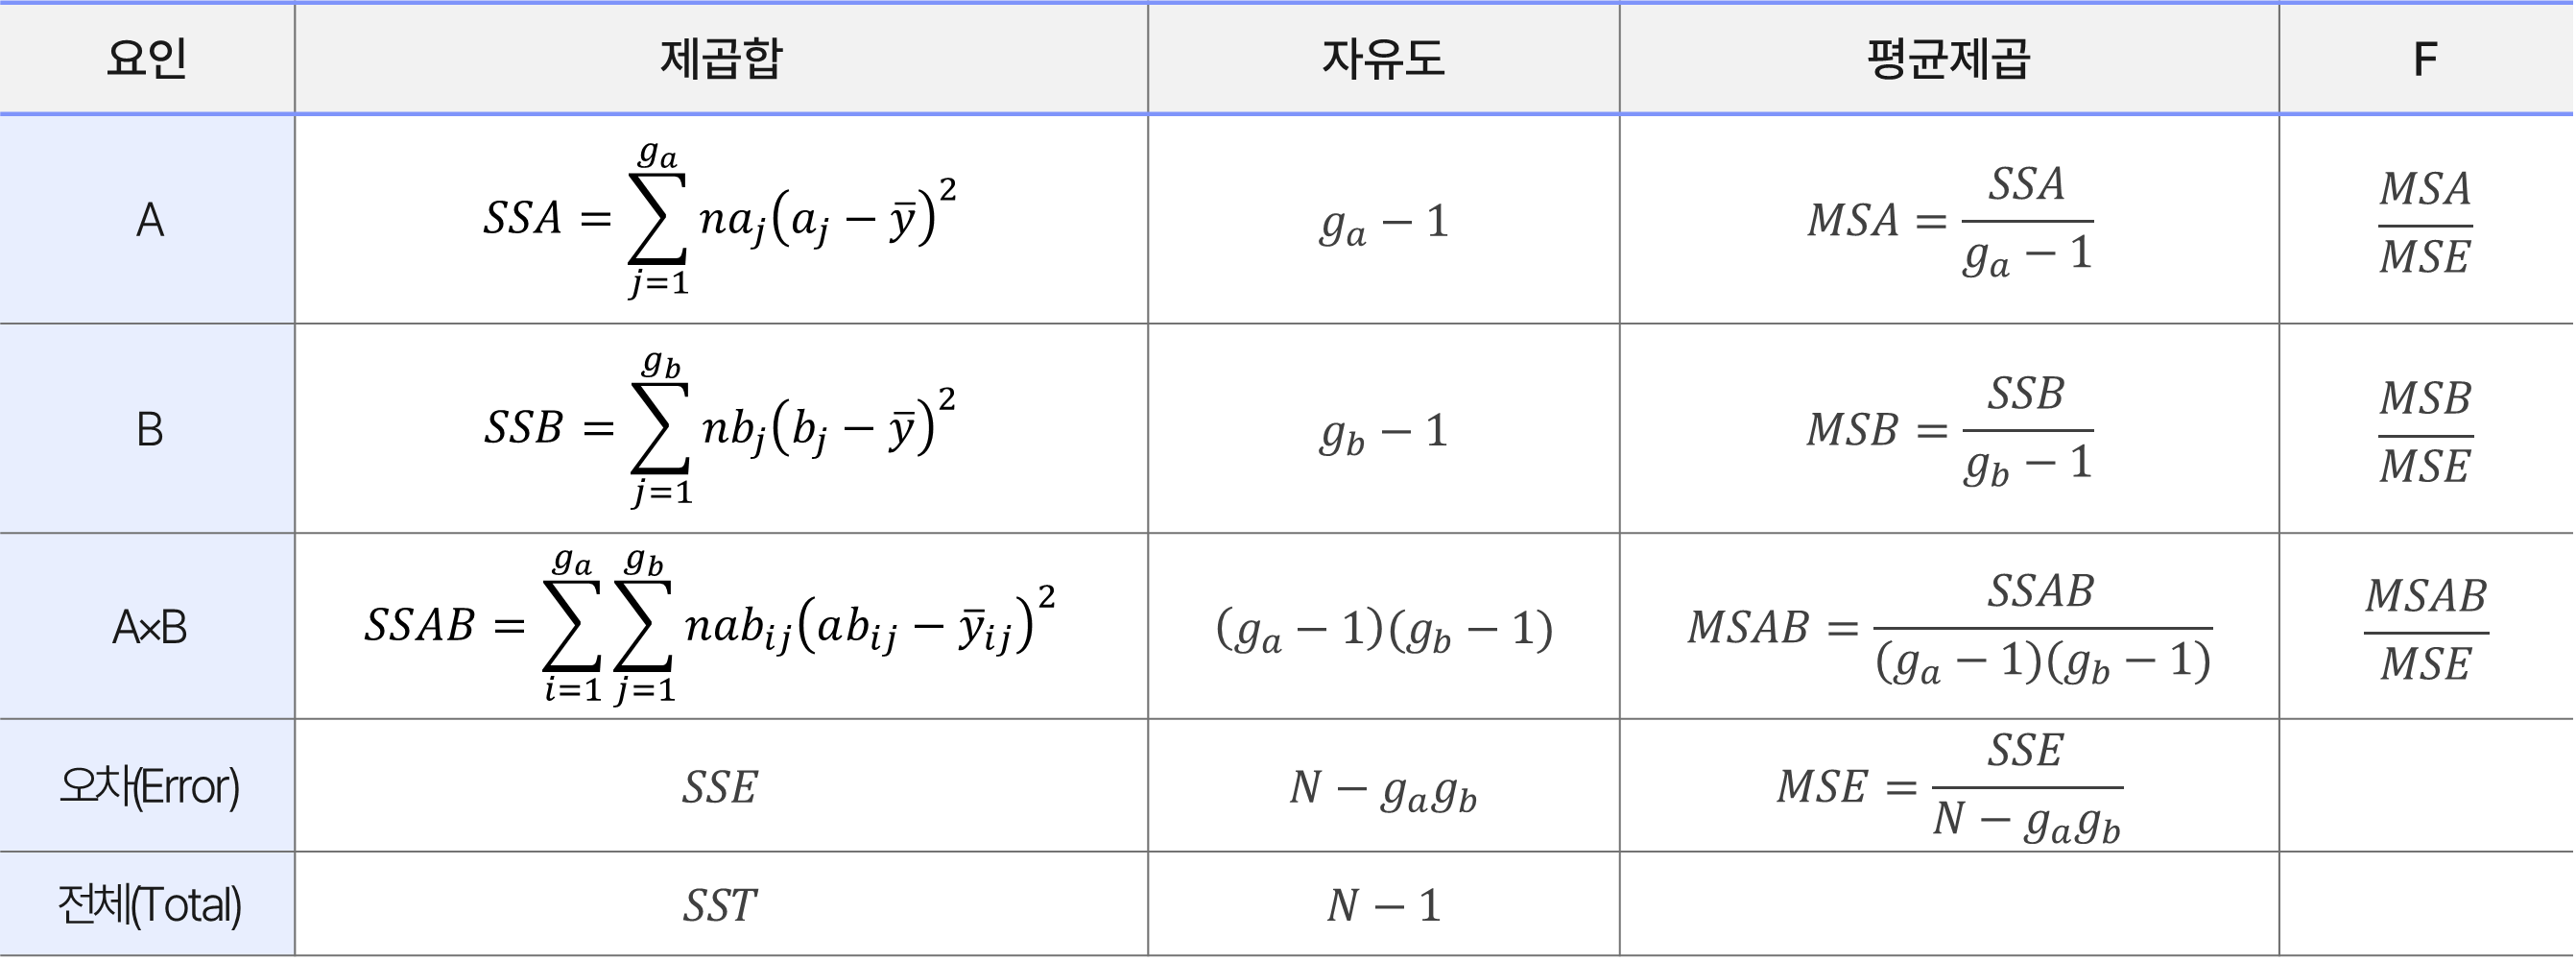
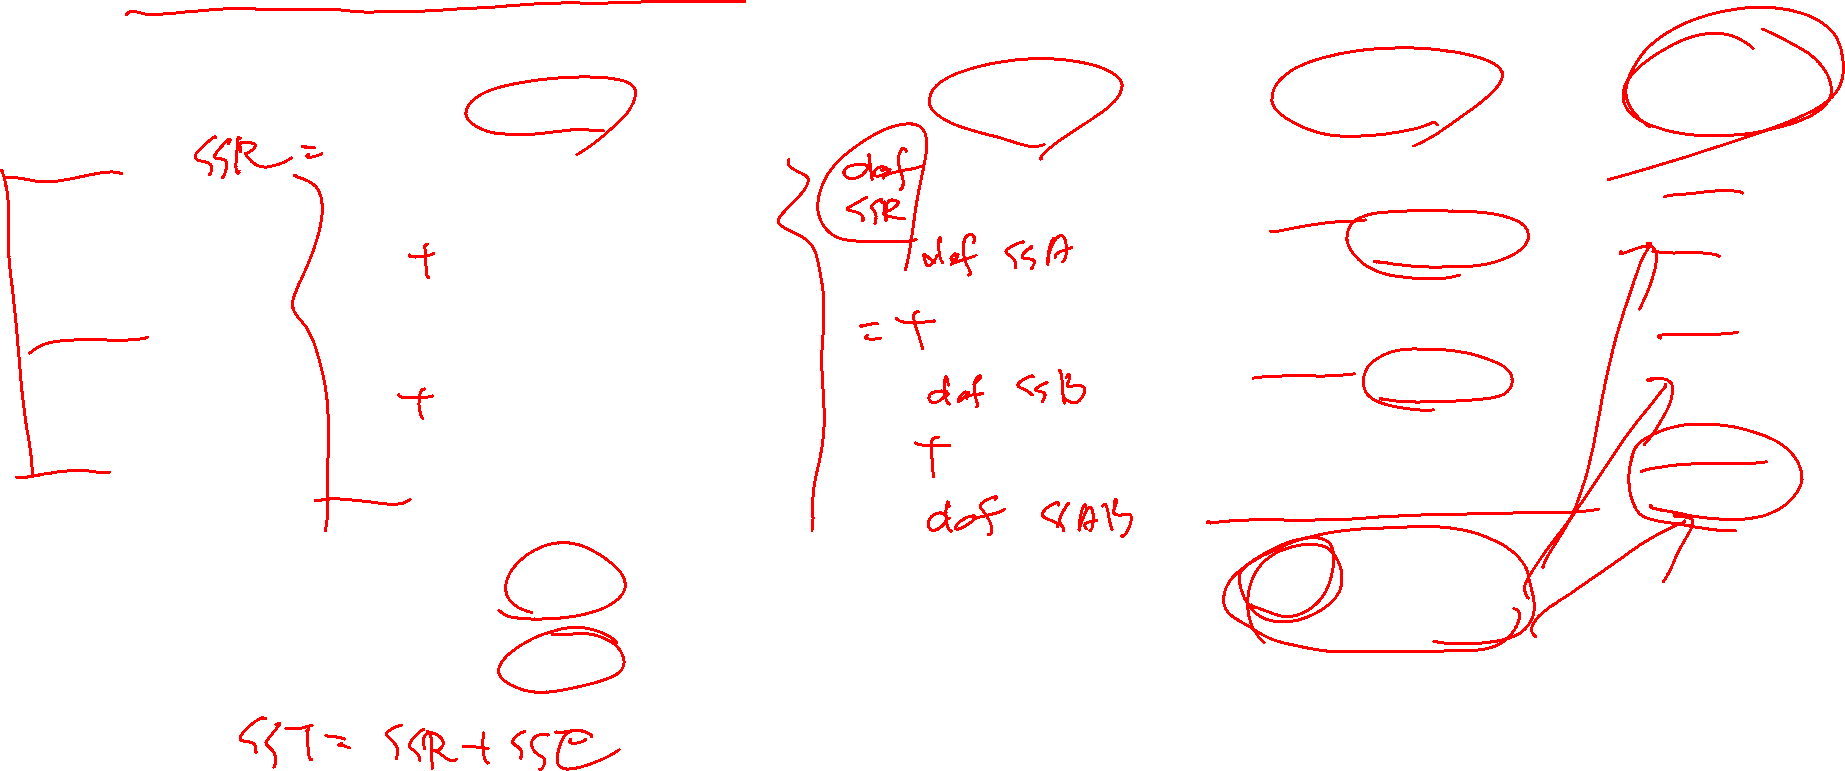


### Slide 22: (Untitled)

- 카이제곱 검정
- 검정통계량
- 검정 종류: 우측 꼬리 검정
- 9
- 검정 방법
- 관측 빈도와 기대 빈도의 차이를 통한 검정
- 검정의 내용과 관점에 따라 크게 3 가지로 구분
- 적합도(Goodness-of-Fit) 검정
- 독립성(Independence) 검정
- 동질성(Homogeneity) 검정

**Equation 22.1**
$$
𝜒2=𝑖𝑂𝑖−𝐸𝑖2𝐸𝑖~𝜒2(𝑑𝑓)
$$

**Equation 22.2**
$$
𝜒2=𝑖𝑂𝑖−𝐸𝑖2𝐸𝑖~𝜒2(𝑑𝑓)
$$

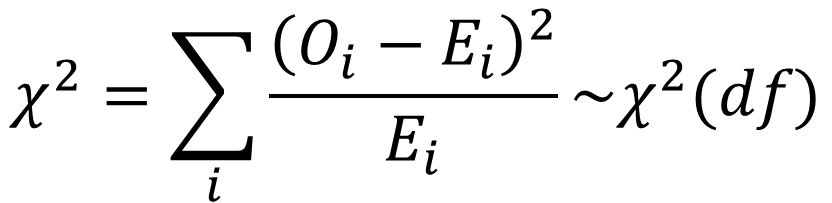
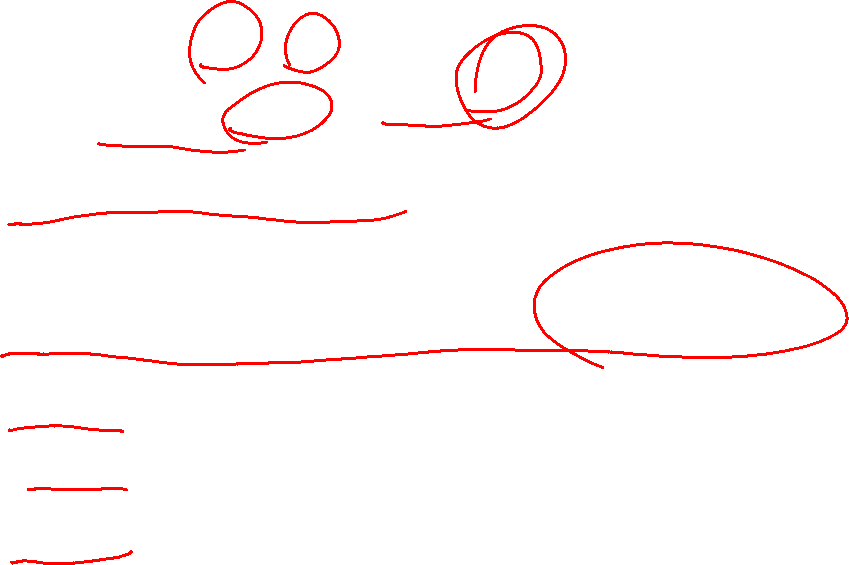


### Slide 23: (Untitled)

- 카이제곱 검정
- 모집단은 이론적 분포를 따름
- 모집단은 이론적 분포에 따르지 않음
- 변수값
- 1
- 2
- …
- k
- 이론적 확률
- …
- 1
- 2
- …
- k
- …
- 9
- 적합도(Goodness-of-Fit) 검정

**Table 23.1**
| 변수값 | 1 | 2 | … | k |
| --- | --- | --- | --- | --- |
| 이론적 확률 |   |   | … |   |

**Table 23.2**
|   | 1 | 2 | … | k |
| --- | --- | --- | --- | --- |
|   |   |   | … |   |

**Equation 23.1**
$$
𝐻0:
$$

**Equation 23.2**
$$
𝐻1:
$$

**Equation 23.3**
$$
(𝑖)
$$

**Equation 23.4**
$$
𝑷(𝑿=𝒊)
$$

**Equation 23.5**
$$
𝑝1
$$

**Equation 23.6**
$$
𝑝2
$$

**Equation 23.7**
$$
𝑝𝑘
$$

**Equation 23.8**
$$
𝐻0:𝑃𝑋=1=𝑝1,𝑃𝑋=2=𝑝2,…𝑃𝑋=𝑘=𝑝𝑘
$$

**Equation 23.9**
$$
𝐻1:𝑃𝑋=1≠𝑝1 𝑜𝑟 𝑃𝑋=2≠𝑝2,…𝑃𝑋=𝑘≠𝑝𝑘
$$

**Equation 23.10**
$$
𝑷(𝑿=𝒊)
$$

**Equation 23.11**
$$
𝑝1
$$

**Equation 23.12**
$$
𝑝2
$$

**Equation 23.13**
$$
𝑝𝑘
$$

**Equation 23.14**
$$
𝐻0:𝑃𝑋=1=𝑝1,𝑃𝑋=2=𝑝2,…𝑃𝑋=𝑘=𝑝𝑘
$$

**Equation 23.15**
$$
𝐻1:𝑃𝑋=1≠𝑝1 𝑜𝑟 𝑃𝑋=2≠𝑝2,…𝑃𝑋=𝑘≠𝑝𝑘
$$

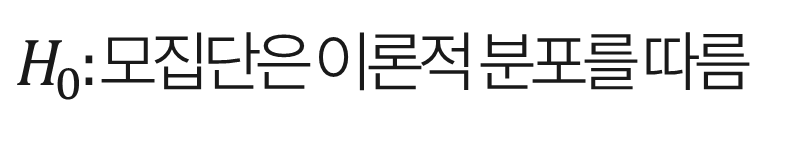
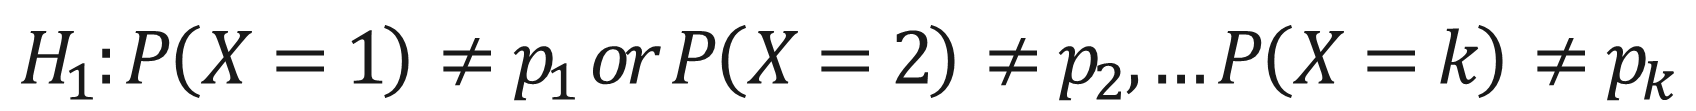
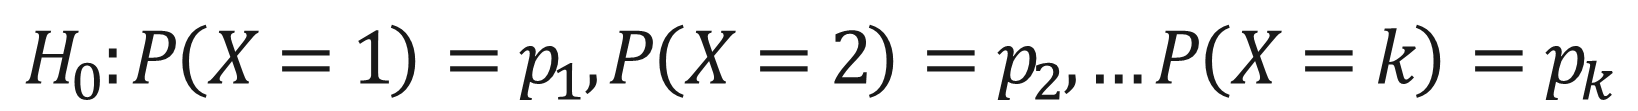
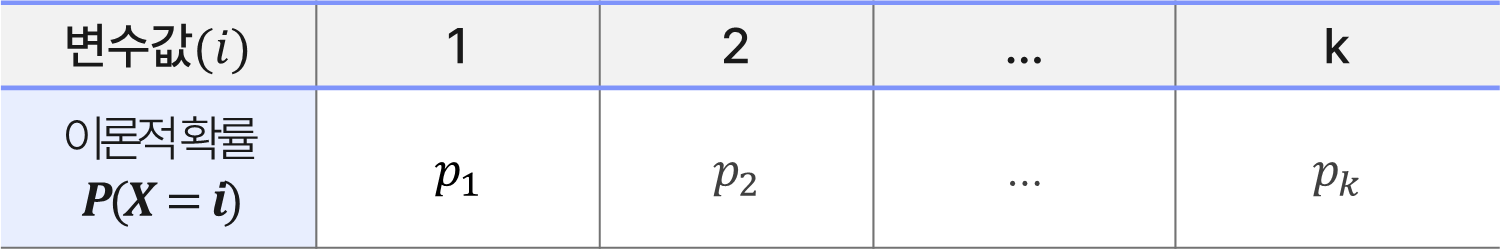
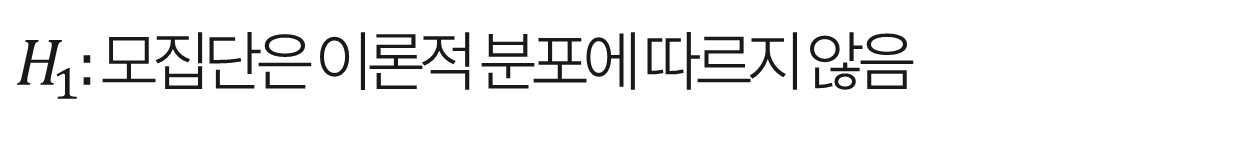
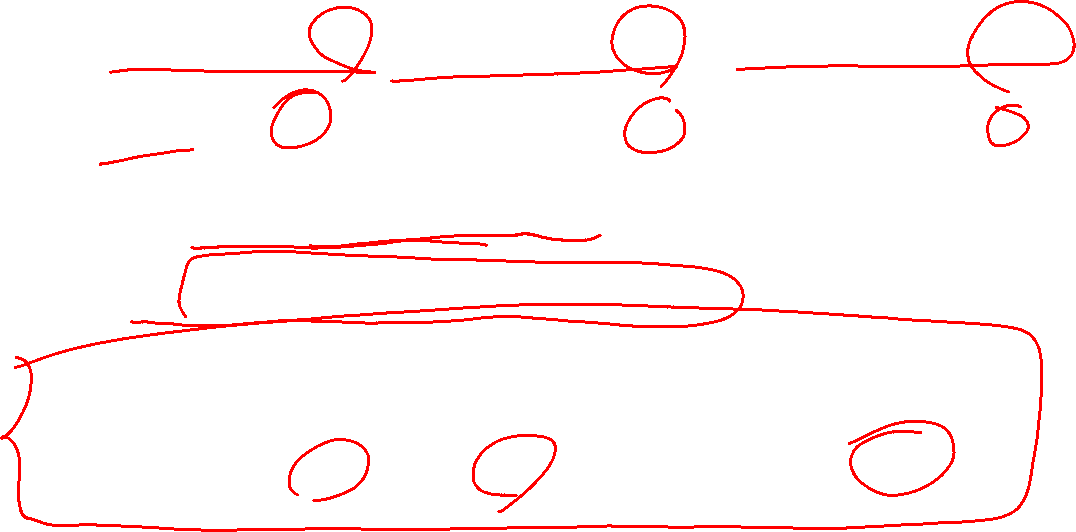


### Slide 24: (Untitled)

- 검정통계량 계산
- 카이제곱 검정
- 9
- (변수값 의 기대 빈도)
- 변수값 가 관측된 빈도
- 변수값
- 1
- 2
- …
- k
- 이론적 확률
- …
- 1
- 2
- …
- k
- …
- 변수값
- 1
- 2
- …
- k
- 관측빈도
- …
- 1
- 2
- …
- k
- …

**Table 24.1**
| 변수값 | 1 | 2 | … | k |
| --- | --- | --- | --- | --- |
| 이론적 확률 |   |   | … |   |

**Table 24.2**
|   | 1 | 2 | … | k |
| --- | --- | --- | --- | --- |
|   |   |   | … |   |

**Table 24.3**
| 변수값 | 1 | 2 | … | k |
| --- | --- | --- | --- | --- |
| 관측빈도 |   |   | … |   |

**Table 24.4**
|   | 1 | 2 | … | k |
| --- | --- | --- | --- | --- |
|   |   |   | … |   |

**Equation 24.1**
$$
𝐸𝑖=𝑁𝑝𝑖
$$

**Equation 24.2**
$$
𝑖
$$

**Equation 24.3**
$$
𝑂𝑖=
$$

**Equation 24.4**
$$
𝑖
$$

**Equation 24.5**
$$
(𝑖)
$$

**Equation 24.6**
$$
𝑷(𝑿=𝒊)
$$

**Equation 24.7**
$$
𝑝1
$$

**Equation 24.8**
$$
𝑝2
$$

**Equation 24.9**
$$
𝑝𝑘
$$

**Equation 24.10**
$$
(𝑖)
$$

**Equation 24.11**
$$
𝑿=𝒊
$$

**Equation 24.12**
$$
𝑂1
$$

**Equation 24.13**
$$
𝑂2
$$

**Equation 24.14**
$$
𝑂𝑘
$$

**Equation 24.15**
$$
𝜒2=𝑖=1𝑘𝑂𝑖−𝐸𝑖2𝐸𝑖~𝜒2(𝑘−1)
$$

**Equation 24.16**
$$
𝑷(𝑿=𝒊)
$$

**Equation 24.17**
$$
𝑝1
$$

**Equation 24.18**
$$
𝑝2
$$

**Equation 24.19**
$$
𝑝𝑘
$$

**Equation 24.20**
$$
𝑿=𝒊
$$

**Equation 24.21**
$$
𝑂1
$$

**Equation 24.22**
$$
𝑂2
$$

**Equation 24.23**
$$
𝑂𝑘
$$

**Equation 24.24**
$$
𝜒2=𝑖=1𝑘𝑂𝑖−𝐸𝑖2𝐸𝑖~𝜒2(𝑘−1)
$$

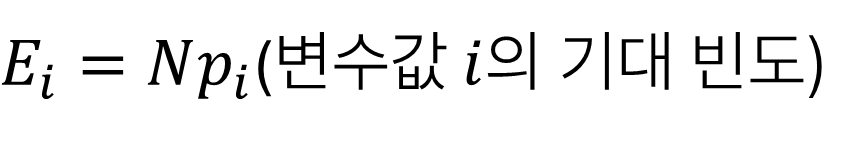
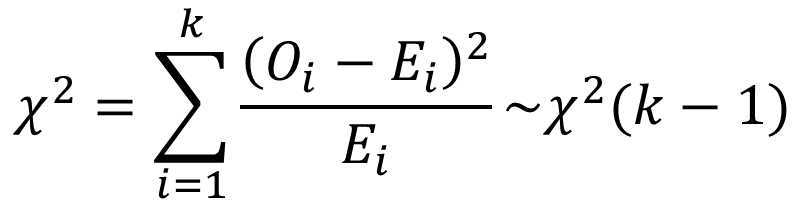
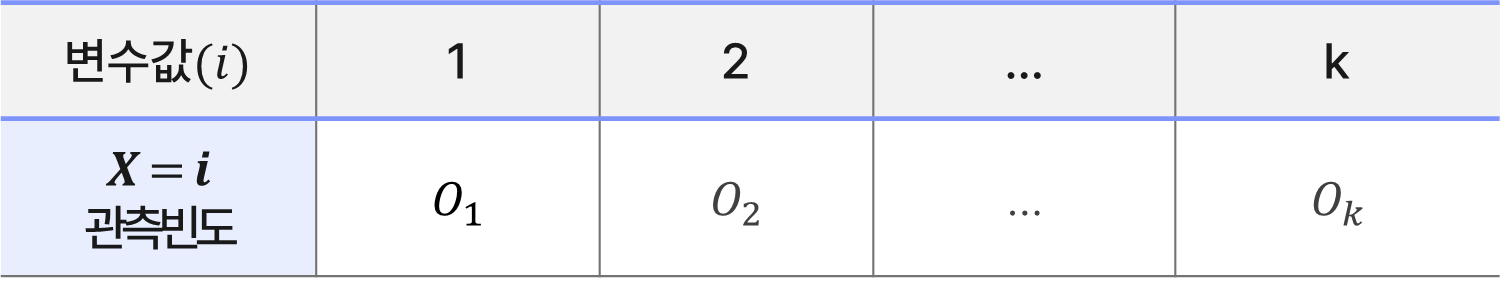
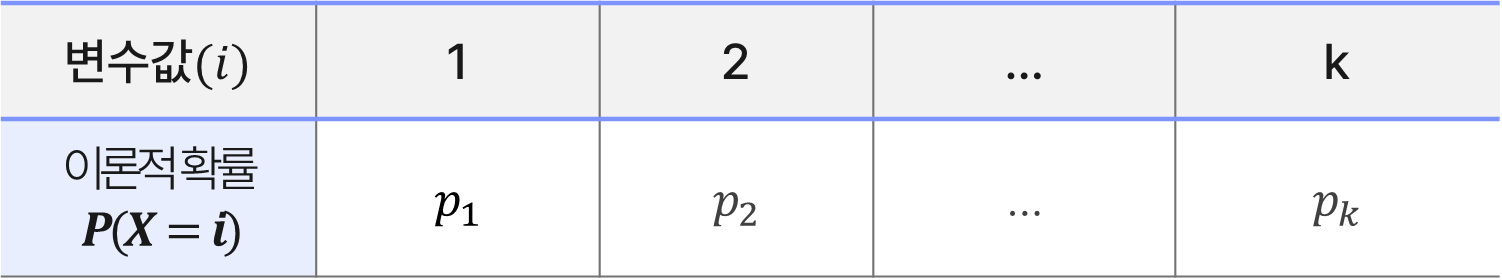
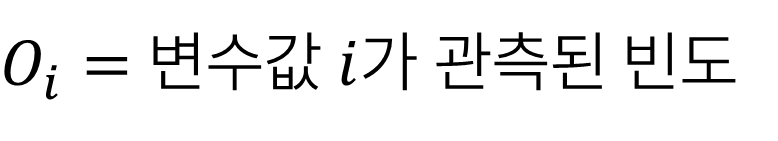
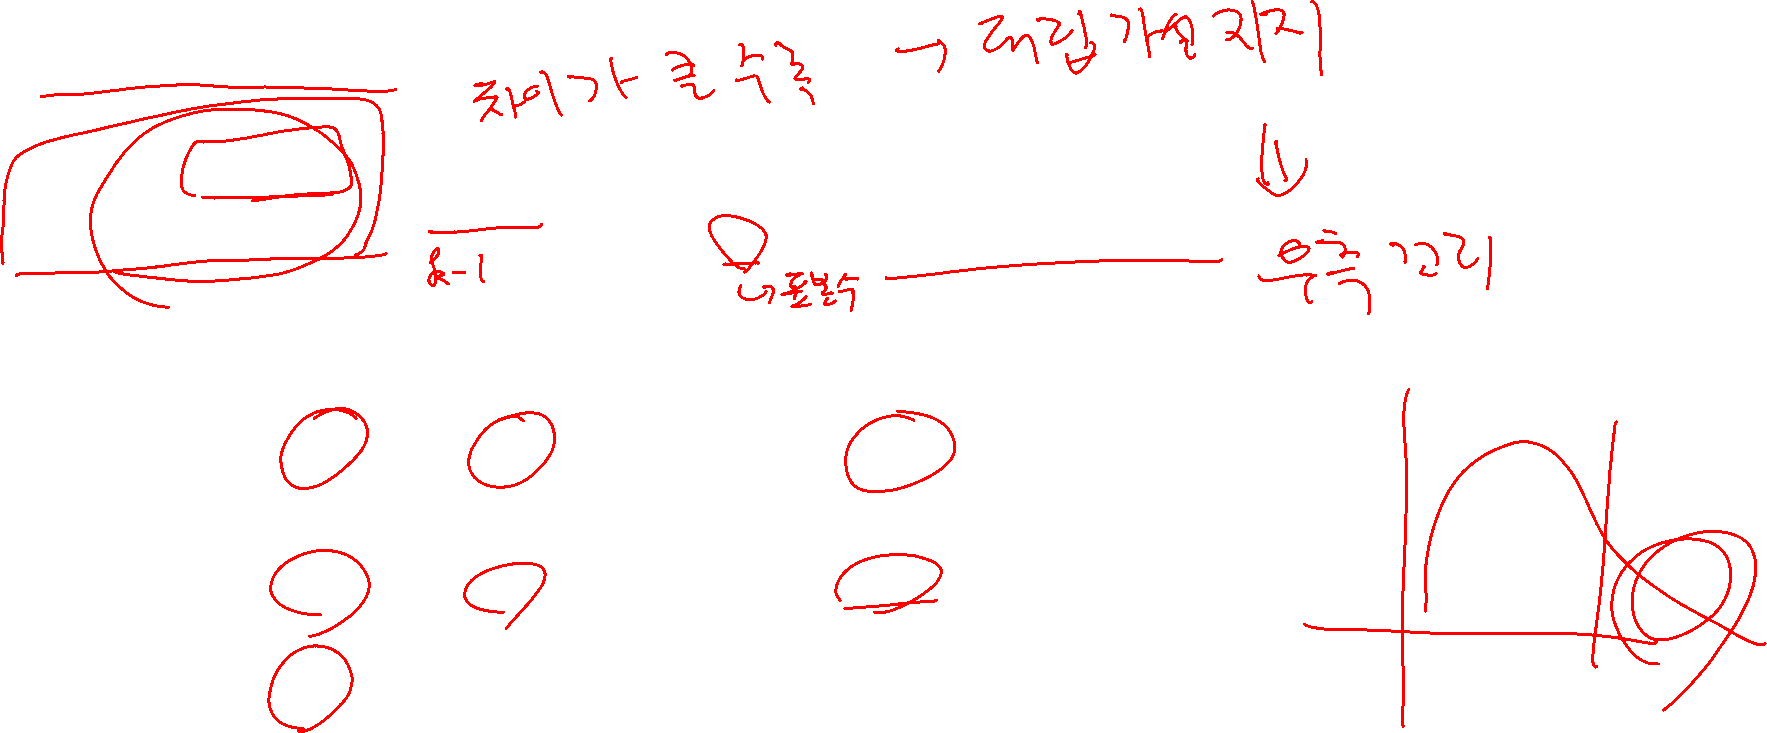


### Slide 25: (Untitled)

- 카이제곱 검정
- 두 변수는 독립이 아님
- 두 변수는 독립
- 9
- 독립성(Independence) 검정
- 정통계량 계산

**Equation 25.1**
$$
𝐻1 :
$$

**Equation 25.2**
$$
𝐻0 :
$$

**Equation 25.3**
$$
검
$$

**Equation 25.4**
$$
𝐻1:𝑃𝐴𝑖∩𝐵𝑗≠𝑃𝐴𝑖𝑃(𝐵𝑗)
$$

**Equation 25.5**
$$
𝐻0:𝑃𝐴𝑖∩𝐵𝑗=𝑃𝐴𝑖𝑃(𝐵𝑗)
$$

**Equation 25.6**
$$
𝜒2=𝑖=1𝑚𝑗=1𝑛𝑂𝑖𝑗−𝐸𝑖𝑗2𝐸𝑖𝑗~𝜒2𝑚−1𝑛−1
$$

**Equation 25.7**
$$
𝐻1:𝑃𝐴𝑖∩𝐵𝑗≠𝑃𝐴𝑖𝑃(𝐵𝑗)
$$

**Equation 25.8**
$$
𝐻0:𝑃𝐴𝑖∩𝐵𝑗=𝑃𝐴𝑖𝑃(𝐵𝑗)
$$

**Equation 25.9**
$$
𝜒2=𝑖=1𝑚𝑗=1𝑛𝑂𝑖𝑗−𝐸𝑖𝑗2𝐸𝑖𝑗~𝜒2𝑚−1𝑛−1
$$

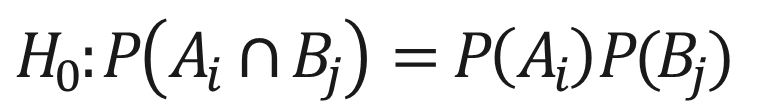
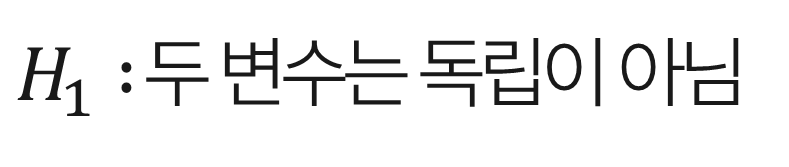
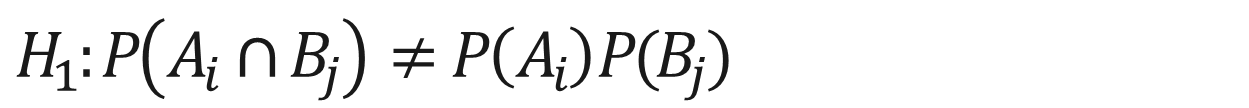
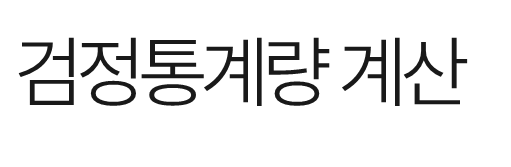
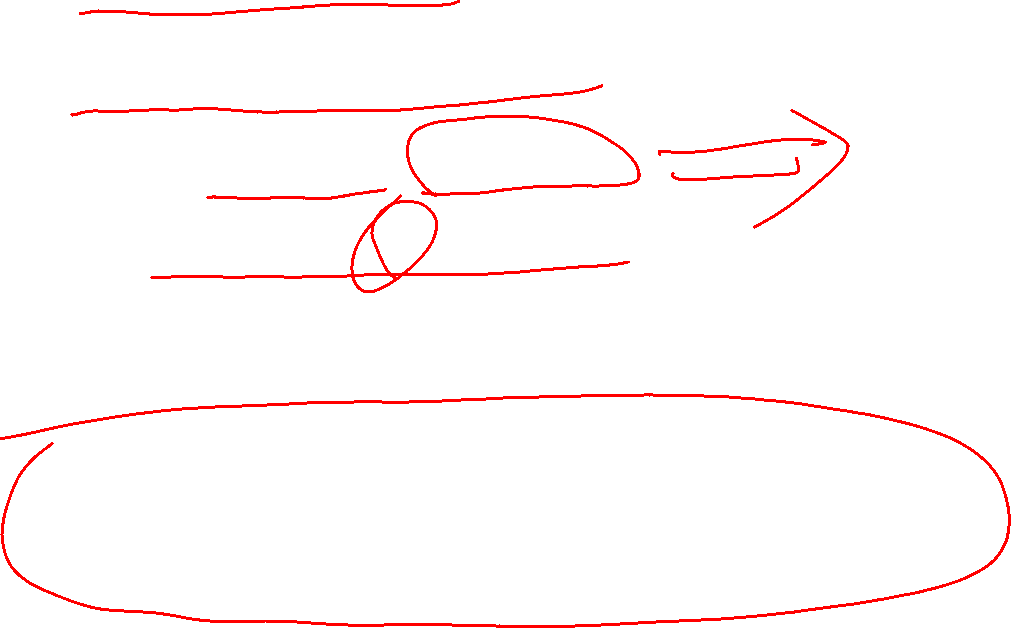
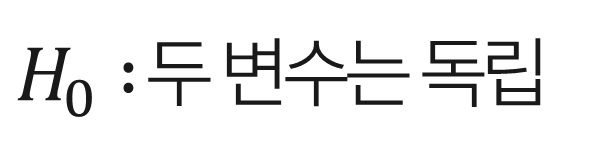
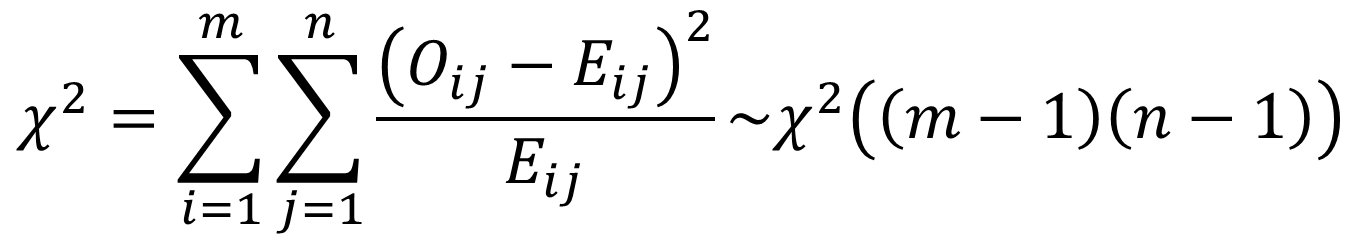


### Slide 26: (Untitled)

- 카이제곱 검정
- 9
- 관측 빈도수 테이블
- A 1
- A 2
- …
- A n
- 행 합계
- B 1
- …
- N 1
- B 2
- …
- N 2
- …
- …
- …
- …
- …
- …
- B m
- …
- N m
- 열합계
- M 1
- M 2
- …
- M m
- A 1
- A 2
- …
- A n
- 행 합계
- B 1
- …
- N 1
- B 2
- …
- N 2
- …
- …
- …
- …
- …
- …
- B m
- …
- N m
- 열합계
- M 1
- M 2
- …
- M m
- 기대 빈도 계산에서 활용

**Table 26.1**
|   | A 1 | A 2 | … | A n | 행 합계 |
| --- | --- | --- | --- | --- | --- |
| B 1 |   |   | … |   | N 1 |
| B 2 |   |   | … |   | N 2 |
| … | … | … | … | … | … |
| B m |   |   | … |   | N m |
| 열합계 | M 1 | M 2 | … | M m |   |

**Table 26.2**
|   | A 1 | A 2 | … | A n | 행 합계 |
| --- | --- | --- | --- | --- | --- |
| B 1 |   |   | … |   | N 1 |
| B 2 |   |   | … |   | N 2 |
| … | … | … | … | … | … |
| B m |   |   | … |   | N m |
| 열합계 | M 1 | M 2 | … | M m |   |

**Equation 26.1**
$$
𝑂11
$$

**Equation 26.2**
$$
𝑂12
$$

**Equation 26.3**
$$
𝑂1𝑛
$$

**Equation 26.4**
$$
𝑂21
$$

**Equation 26.5**
$$
𝑂22
$$

**Equation 26.6**
$$
𝑂2𝑛
$$

**Equation 26.7**
$$
𝑂𝑚1
$$

**Equation 26.8**
$$
𝑂𝑚2
$$

**Equation 26.9**
$$
𝑂𝑚𝑛
$$

**Equation 26.10**
$$
𝑂11
$$

**Equation 26.11**
$$
𝑂12
$$

**Equation 26.12**
$$
𝑂1𝑛
$$

**Equation 26.13**
$$
𝑂21
$$

**Equation 26.14**
$$
𝑂22
$$

**Equation 26.15**
$$
𝑂2𝑛
$$

**Equation 26.16**
$$
𝑂𝑚1
$$

**Equation 26.17**
$$
𝑂𝑚2
$$

**Equation 26.18**
$$
𝑂𝑚𝑛
$$

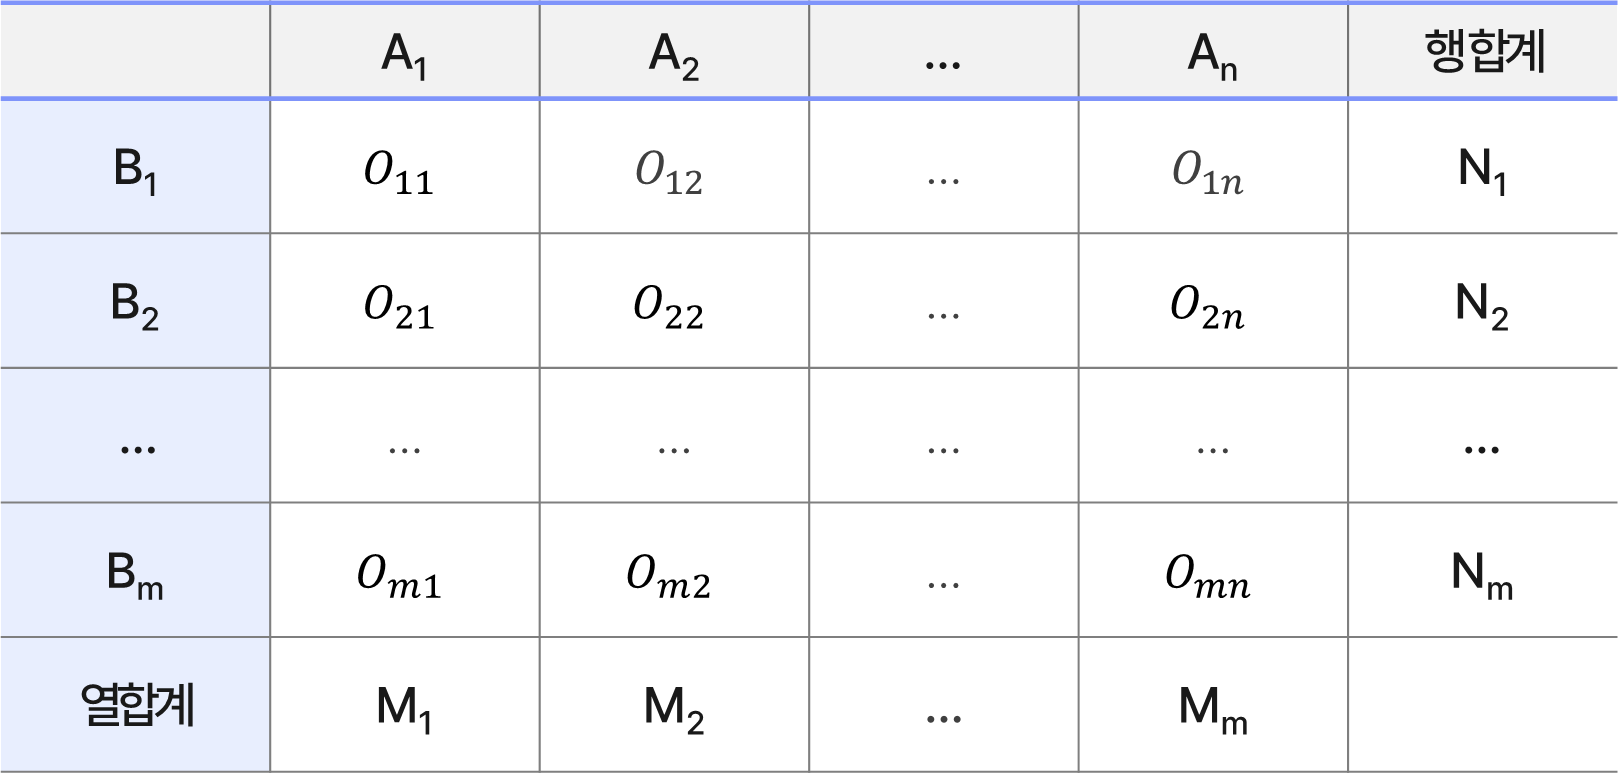
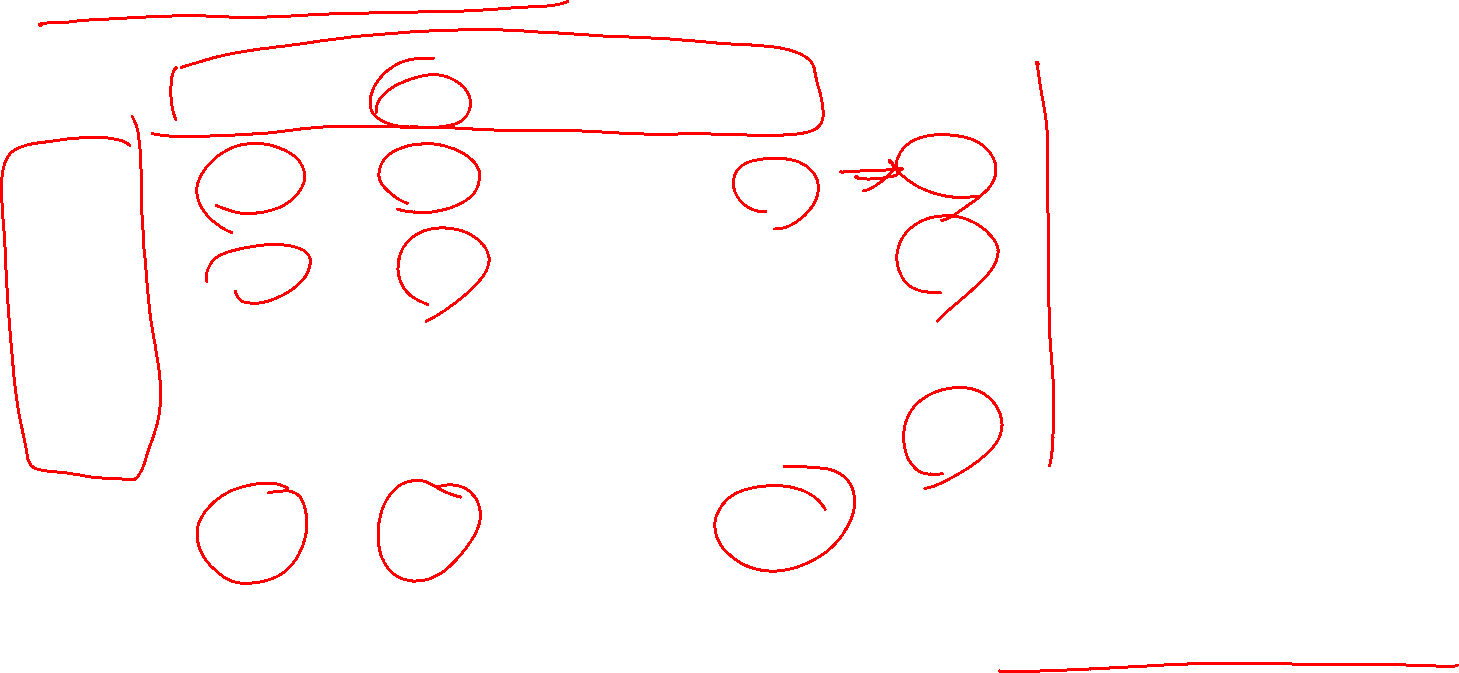


### Slide 27: (Untitled)

- 카이제곱 검정
- 9
- 기대 빈도수 테이블
- N 1
- N 2
- …
- N m
- M 1
- M 2
- …
- M m
- …
- …
- …
- …
- …
- …
- …
- …
- …
- …
- …
- …
- …
- …
- ×
- / N =
- 관측빈도수 테이블에서 구한 두 변수에서 빈도수

**Table 27.1**
| N 1 |
| --- |
| N 2 |
| … |
| N m |
|   |

**Table 27.2**
| M 1 | M 2 | … | M m |
| --- | --- | --- | --- |

**Table 27.3**
|   |   | … |   |
| --- | --- | --- | --- |
|   |   | … |   |
| … | … | … | … |
|   |   | … |   |

**Table 27.4**
|   |   | … |   |
| --- | --- | --- | --- |
|   |   | … |   |
| … | … | … | … |
|   |   | … |   |

**Equation 27.1**
$$
𝐸11
$$

**Equation 27.2**
$$
𝐸12
$$

**Equation 27.3**
$$
𝐸1𝑛
$$

**Equation 27.4**
$$
𝐸21
$$

**Equation 27.5**
$$
𝐸22
$$

**Equation 27.6**
$$
𝐸2𝑛
$$

**Equation 27.7**
$$
𝐸𝑚1
$$

**Equation 27.8**
$$
𝐸𝑚2
$$

**Equation 27.9**
$$
𝐸𝑚𝑛
$$

**Equation 27.10**
$$
𝐸𝑖𝑗=𝑁𝑖𝑁𝑀𝑗𝑁𝑁=𝑁𝑖𝑀𝑗𝑁
$$

**Equation 27.11**
$$
𝐸11
$$

**Equation 27.12**
$$
𝐸12
$$

**Equation 27.13**
$$
𝐸1𝑛
$$

**Equation 27.14**
$$
𝐸21
$$

**Equation 27.15**
$$
𝐸22
$$

**Equation 27.16**
$$
𝐸2𝑛
$$

**Equation 27.17**
$$
𝐸𝑚1
$$

**Equation 27.18**
$$
𝐸𝑚2
$$

**Equation 27.19**
$$
𝐸𝑚𝑛
$$

**Equation 27.20**
$$
𝐸𝑖𝑗=𝑁𝑖𝑁𝑀𝑗𝑁𝑁=𝑁𝑖𝑀𝑗𝑁
$$

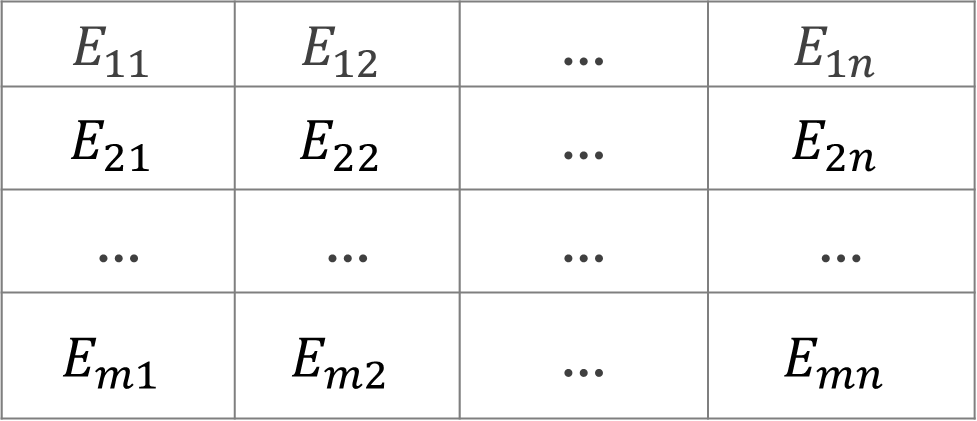
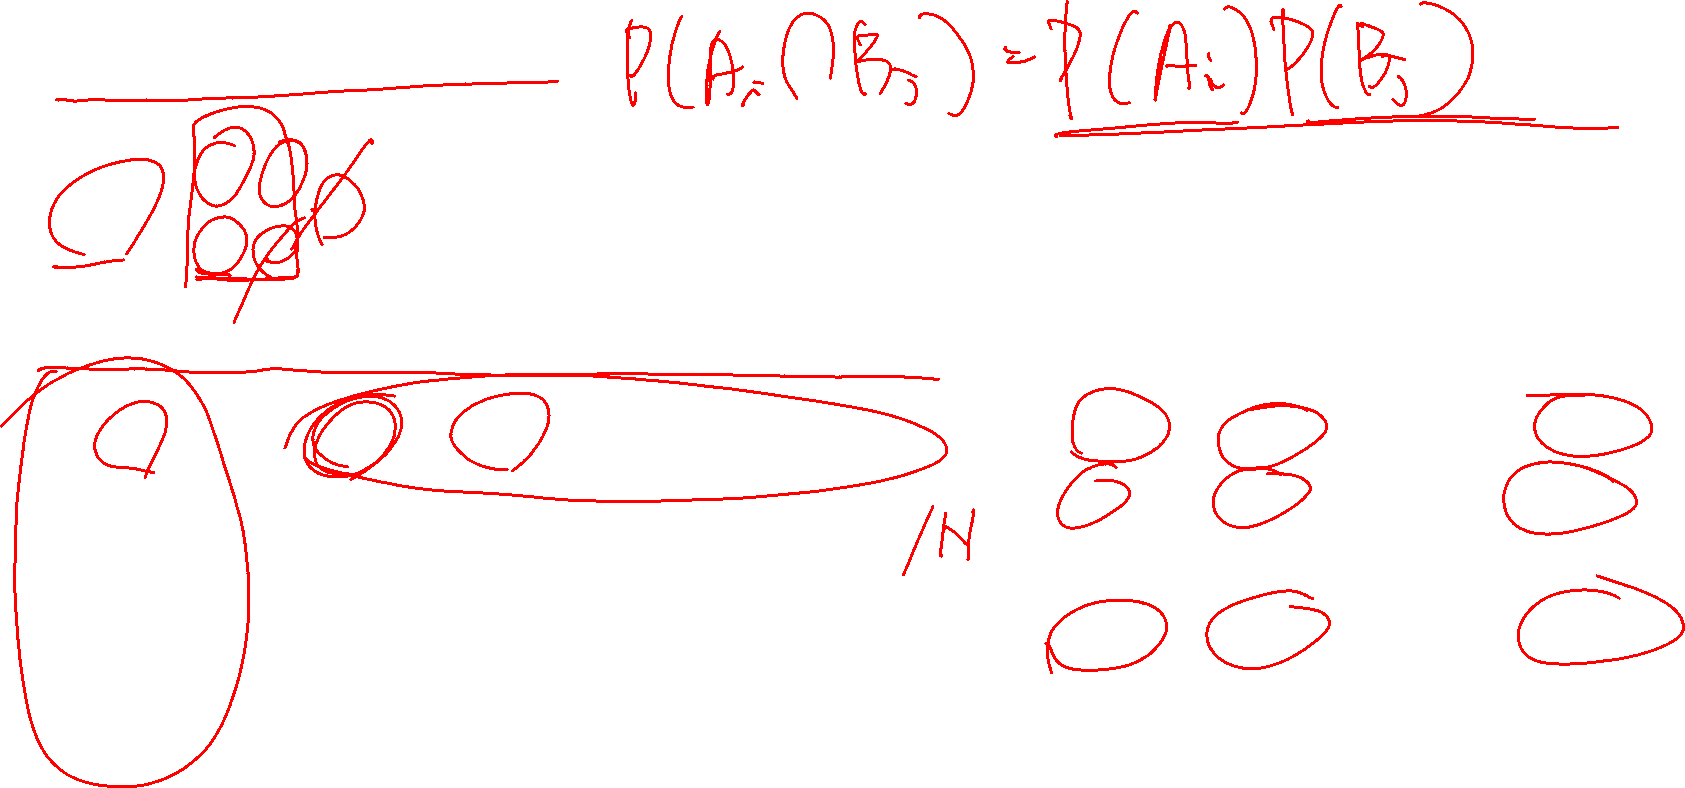
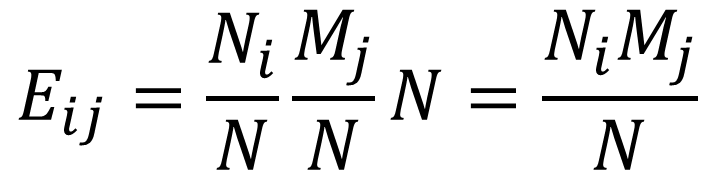


### Slide 28: (Untitled)

- 카이제곱 검정
- 해석의 맥락이 다를 뿐, 방식은 독립성 검정과 같음
- 두 변수는 다른 분포에서 나왔음
- 두 변수는 동일 분포에서 나왔음
- 9
- 동질성(Homogeneity) 검정

**Equation 28.1**
$$
𝐻1 :
$$

**Equation 28.2**
$$
𝐻0 :
$$

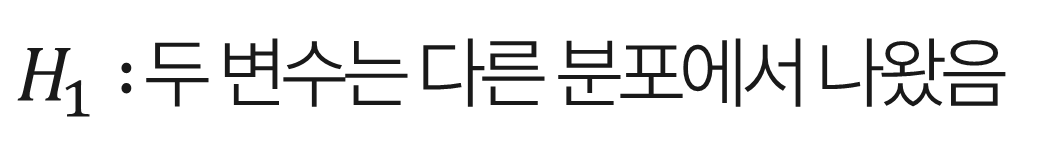
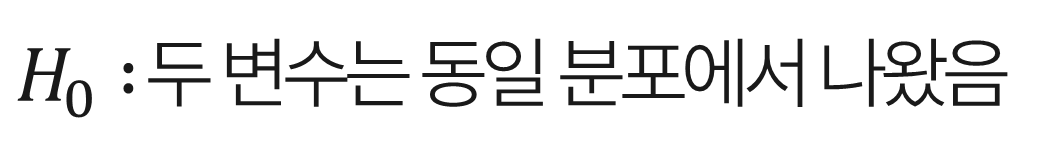


### Slide 29: (Untitled)

- 10
- 문제 풀이
- Q1. 다음 제시된 검정법 중 비모수 검정 방법으로만 묶은 것은?
- A. t-검정
- C. Mann-Whitney U 검정
- B. Kruskal-Wallis 검정
- D. 분산분석
- A, B
- 1
- C, D
- 2
- A, D
- 3
- B, C
- 4


### Slide 30: (Untitled)

- 10
- 문제 풀이
- Q1. 다음 제시된 검정법 중 비모수 검정 방법으로만 묶은 것은?
- A. t-검정
- C. Mann-Whitney U 검정
- B. Kruskal-Wallis 검정
- D. 분산분석
- A, D 는 모두 정규 분포를 가정하고 있는 모수적 검정 방법입니다.
- A, B
- 1
- C, D
- 2
- A, D
- 3
- 4
- B, C


### Slide 31: (Untitled)

- 10
- 문제 풀이
- Q2. 다음 이원 분산분석 테이블에서 (ㄱ),(ㄴ),(ㄷ)에 들어갈 숫자를 올바르게 계산한 것은?
- 26, 24, 3.25
- 1
- 26, 25, 4
- 2
- 28, 25, 4
- 3
- 28, 24, 3.25
- 4
- 요인
- 제곱합(SS)
- 자유도(df)
- 평균제곱(MS)
- F(검정통계량)
- A
- 40
- 2
- 20
- 5
- B
- 18
- 1
- 18
- 4.5
- A×B
- (ㄱ)
- 2
- 13
- )
- 오차(Error)
- 96
- )
- 4
- 전체(Total)
- 180
- 29
- 요인
- 제곱합(SS)
- 자유도(df)
- 평균제곱(MS)
- F(검정통계량)
- A
- 40
- 2
- 20
- 5
- B
- 18
- 1
- 18
- 4.5
- A×B
- (ㄱ)
- 2
- 13
- 오차(Error)
- 96
- 4
- 전체(Total)
- 180
- 29

**Table 31.1**
| 요인 | 제곱합(SS) | 자유도(df) | 평균제곱(MS) | F(검정통계량) |
| --- | --- | --- | --- | --- |
| A | 40 | 2 | 20 | 5 |
| B | 18 | 1 | 18 | 4.5 |
| A×B | (ㄱ) | 2 | 13 | ) |
| 오차(Error) | 96 | ) | 4 |   |
| 전체(Total) | 180 | 29 |   |   |

**Table 31.2**
| 요인 | 제곱합(SS) | 자유도(df) | 평균제곱(MS) | F(검정통계량) |
| --- | --- | --- | --- | --- |
| A | 40 | 2 | 20 | 5 |
| B | 18 | 1 | 18 | 4.5 |
| A×B | (ㄱ) | 2 | 13 |   |
| 오차(Error) | 96 |   | 4 |   |
| 전체(Total) | 180 | 29 |   |   |

**Equation 31.1**
$$
(ㄷ
$$

**Equation 31.2**
$$
(ㄴ
$$

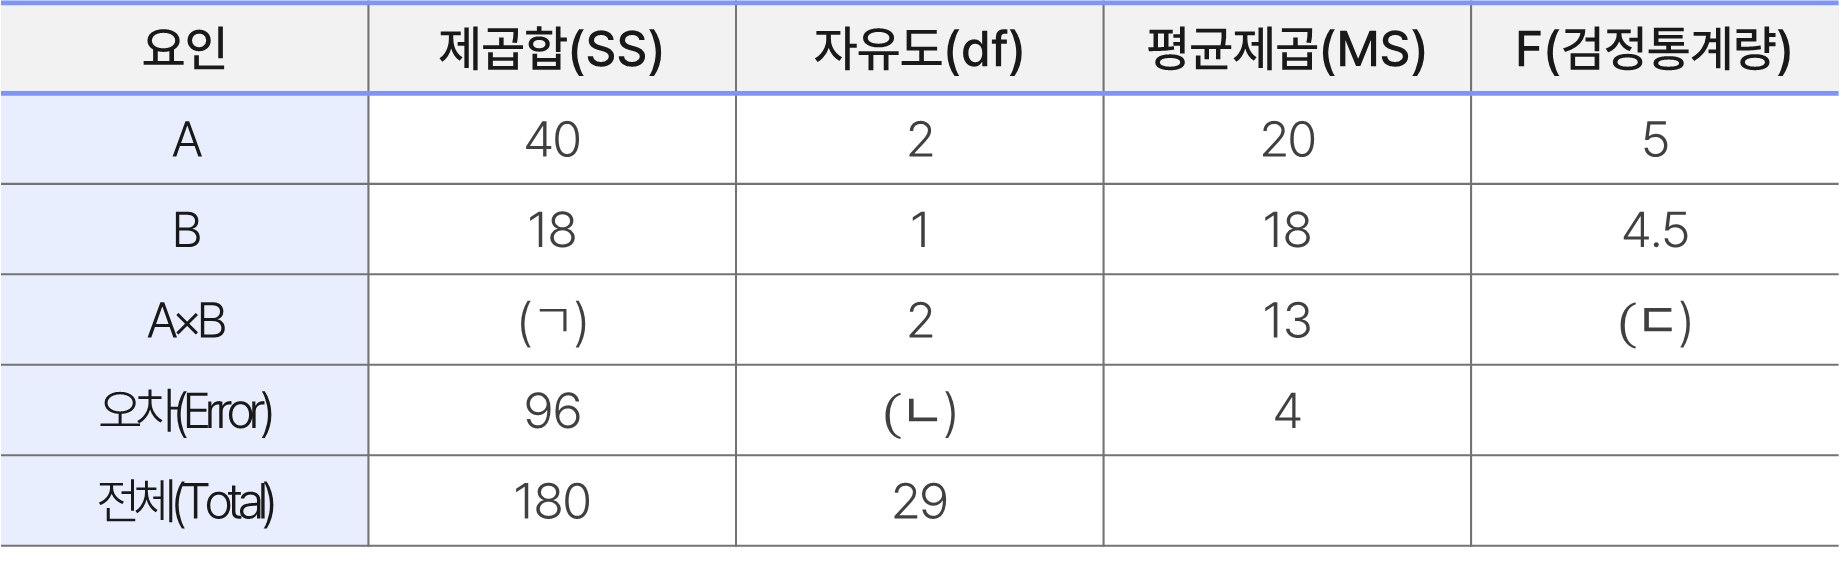


### Slide 32: (Untitled)

- 10
- 문제 풀이
- Q2. 다음 이원 분산분석 테이블에서 (ㄱ),(ㄴ),(ㄷ)에 들어갈 숫자를 올바르게 계산한 것은?
- 26, 24, 3.25
- 1
- 26, 25, 4
- 2
- 28, 25, 4
- 3
- 28, 24, 3.25
- 4
- 요인
- 제곱합(SS)
- 자유도(df)
- 평균제곱(MS)
- F(검정통계량)
- A
- 40
- 2
- 20
- 5
- B
- 18
- 1
- 18
- 4.5
- A×B
- (ㄱ)
- 2
- 13
- )
- 오차(Error)
- 96
- )
- 4
- 전체(Total)
- 180
- 29
- 요인
- 제곱합(SS)
- 자유도(df)
- 평균제곱(MS)
- F(검정통계량)
- A
- 40
- 2
- 20
- 5
- B
- 18
- 1
- 18
- 4.5
- A×B
- (ㄱ)
- 2
- 13
- 오차(Error)
- 96
- 4
- 전체(Total)
- 180
- 29

**Table 32.1**
| 요인 | 제곱합(SS) | 자유도(df) | 평균제곱(MS) | F(검정통계량) |
| --- | --- | --- | --- | --- |
| A | 40 | 2 | 20 | 5 |
| B | 18 | 1 | 18 | 4.5 |
| A×B | (ㄱ) | 2 | 13 | ) |
| 오차(Error) | 96 | ) | 4 |   |
| 전체(Total) | 180 | 29 |   |   |

**Table 32.2**
| 요인 | 제곱합(SS) | 자유도(df) | 평균제곱(MS) | F(검정통계량) |
| --- | --- | --- | --- | --- |
| A | 40 | 2 | 20 | 5 |
| B | 18 | 1 | 18 | 4.5 |
| A×B | (ㄱ) | 2 | 13 |   |
| 오차(Error) | 96 |   | 4 |   |
| 전체(Total) | 180 | 29 |   |   |

**Equation 32.1**
$$
(ㄷ
$$

**Equation 32.2**
$$
(ㄴ
$$

**Equation 32.3**
$$
𝑆𝑆𝑅=𝑆𝑆𝐴+𝑆𝑆𝐵+𝑆𝑆𝐴𝐵
$$

**Equation 32.4**
$$
𝑆𝑆𝑇=𝑆𝑆𝑅+𝑆𝑆𝐸
$$

**Equation 32.5**
$$
𝐹𝐴×𝐵=𝑀𝑆𝐴𝐵𝑀𝑆𝐸
$$

**Equation 32.6**
$$
𝑑𝑓𝑡𝑜𝑡𝑎𝑙=𝑑𝑓𝐴+𝑑𝑓𝐵+𝑑𝑓𝐴×𝐵+𝑑𝑓𝑒𝑟𝑟𝑜𝑟
$$

**Equation 32.7**
$$
𝑆𝑆𝑅=𝑆𝑆𝐴+𝑆𝑆𝐵+𝑆𝑆𝐴𝐵
$$

**Equation 32.8**
$$
𝑆𝑆𝑇=𝑆𝑆𝑅+𝑆𝑆𝐸
$$

**Equation 32.9**
$$
𝐹𝐴×𝐵=𝑀𝑆𝐴𝐵𝑀𝑆𝐸
$$

**Equation 32.10**
$$
𝑑𝑓𝑡𝑜𝑡𝑎𝑙=𝑑𝑓𝐴+𝑑𝑓𝐵+𝑑𝑓𝐴×𝐵+𝑑𝑓𝑒𝑟𝑟𝑜𝑟
$$

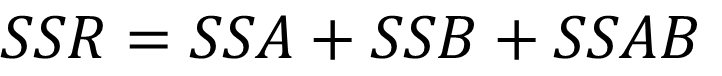
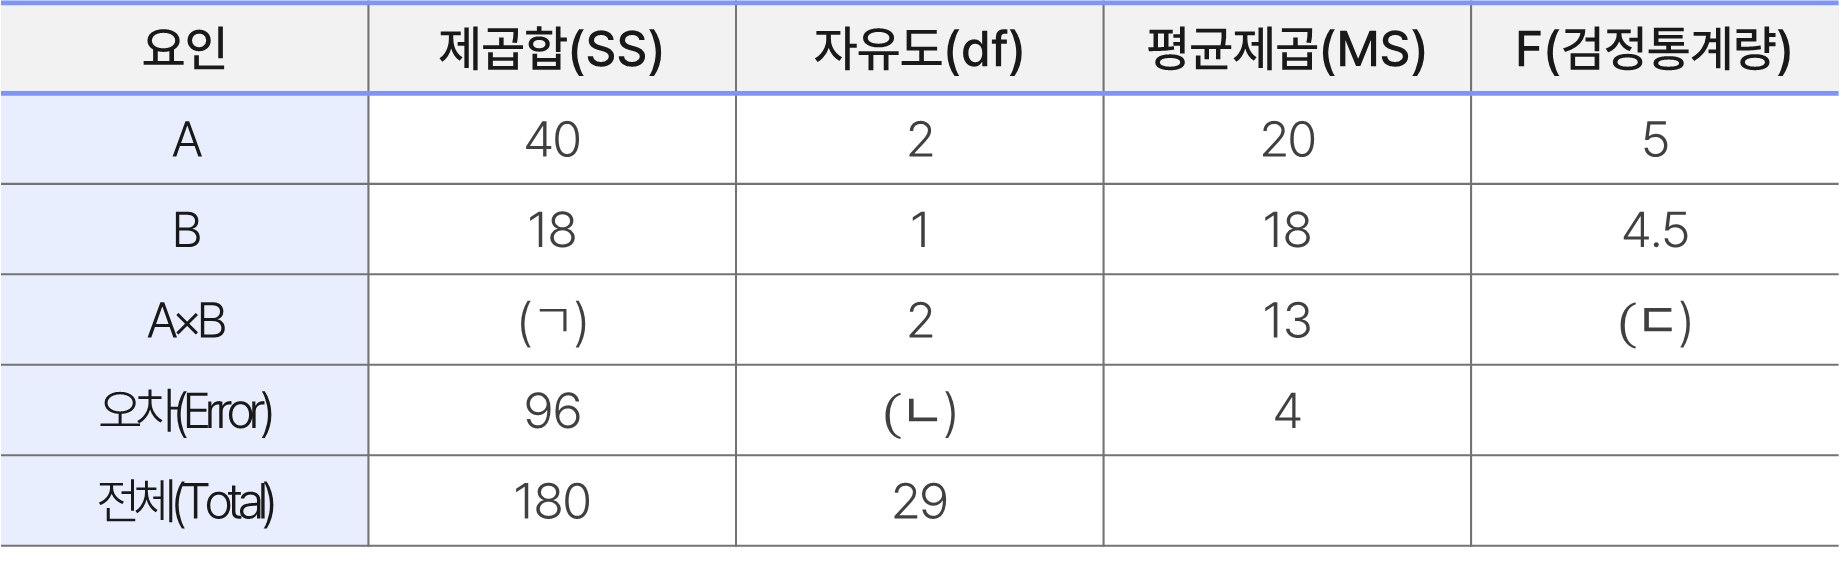
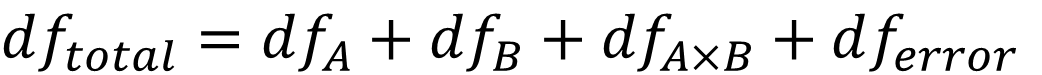
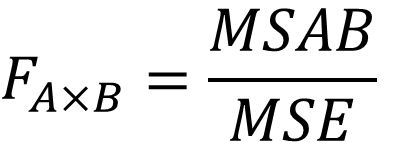
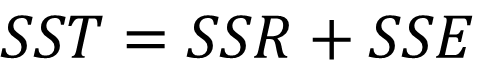


### Slide 33: (Untitled)

- 10
- 문제 풀이
- 1
- 2
- 3
- 4
- 정규성 검정: Shapiro-Wilk
- 등분산성 검정: 분산분석
- 이진형 변수와 수치형 변수와의 연관성: t-독립 검정
- 두 수치형 변수의 연관성: 피어슨 상관도 분석
- Q3. 다음 중 목적에 따른 검정 방법을 잘못 연결한 것은?


### Slide 34: (Untitled)

- 10
- 문제 풀이
- Q3. 다음 중 목적에 따른 검정 방법을 잘못 연결한 것은?
- 2
- ‘분산분석: 범주형 변수와 수치형 변수와의 연관성’이 올바른 연결입니다.
- 1
- 3
- 4
- 정규성 검정: Shapiro-Wilk
- 등분산성 검정: 분산분석
- 이진형 변수와 수치형 변수와의 연관성: t-독립 검정
- 두 수치형 변수의 연관성: 피어슨 상관도 분석

slide34-image1


### Slide 35: (Untitled)

- # 연관성
- # 결론
# 우선 순위
- 추후 디자인하여 PSD 로 편집될 영역입니다.
